# IMPORT

In [1]:
!pip install autocorrect
!pip install symspellpy jamo hangul_utils
!pip install transformers
!pip install preprocess
!pip install contractions
!pip install symspellpy
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 622.8/622.8 kB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622364 sha256=601e974b862ba0a3cf56acf6be62ce4845e0b58b3966381178faa9306e78924c
  Stored in directory: /root/.cache/pip/wheels/b5/7b/6d/b76b29ce11ff8e2521c8c7dd0e5bfee4fb1789d76193124343
Successfully built autocorrect
Requested hangul_utils from https://files.pythonhosted.org/packages/b8/af/9e1beb71959c171d0dfbdd16e475a3ef45bc4bb4b5fd3d5816aad1c46c3c/hangul_utils-0.4.5-py3-none-any.whl has invalid metadata: Expected matching RIGHT_PARENTHESIS for LEFT_PARENTHESIS, after version specifier
    mecab-python (==0.996-ko-0.9.2)
                 ~~~~~~~~^
Please use pip<24.1 if you need to use this version.
Requested hangul_utils from https://files.pythonhosted.org/packages/26/cf/3347a5fa6512dc05a6b840a77fb6067ff89a87587d141959b80c26518208/hangul_utils-0.4.4-py3-none-any.whl has invalid meta

In [2]:
import os
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
import math
import time
import tensorflow as tf
from tensorflow.keras.layers import GRU, LSTM, Bidirectional, Dense, Flatten, Conv1D, BatchNormalization, LeakyReLU, Dropout
from tensorflow.keras import Sequential
from sklearn.metrics import mean_squared_error
from tqdm import tqdm
import statsmodels.api as sm
from datetime import datetime, timedelta
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from pickle import dump, load
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata
import warnings
import matplotlib.dates as mdates

# Ignore warnings
warnings.filterwarnings("ignore")

# NLTK and other libraries
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import requests
import contractions
import spacy
import tqdm

# Additional imports
import transformers
from transformers import BertTokenizer, BertModel, get_linear_schedule_with_warmup

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")

# Set up matplotlib date formatter
import matplotlib.dates as mdates


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
!pip install --upgrade tensorflow


In [4]:
# Importing libraries
#import shap
import tensorflow as tf
import os
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
print(tf.__version__)



import numpy as np
import seaborn as sns
import matplotlib as plt
import pandas as pd
import tensorflow as tf
from dateutil import parser

from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
#import shap
from matplotlib import pyplot
import csv
from datetime import datetime
#import keras_tuner

sns.set_style("dark")
plt.style.use("dark_background")
plt.rcParams['figure.facecolor'] = '#151934'
plt.rcParams['axes.facecolor'] = '#151934'
plt.rcParams.update({'axes.facecolor': '#151934'})
sns.set_palette('pastel')
sns.set_context('talk')
import pandas as pd
# Parse dates and set date column to index

import datetime
from datetime import date, time

# Create a function to plot time series data
def plot_time_series(timesteps, values, format='-', start=0, end=None, label=None):
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("DJIA Stock Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

def mean_absolute_scaled_error(y_true, y_pred):
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))
  return mae / mae_naive_no_season

def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for different sized metrics (for longer horizons, reduce to single number)
  if mae.ndim > 0: # if mae isn't already a scalar, reduce it to one by aggregating tensors to mean
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}


import tensorflow as tf

def evaluate_preds(y_true, y_pred):
    # Ensure input tensors are of type float32
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)

    # Instantiate metrics
    mae_metric = tf.keras.metrics.MeanAbsoluteError()
    mse_metric = tf.keras.metrics.MeanSquaredError()
    mape_metric = tf.keras.metrics.MeanAbsolutePercentageError()

    # Calculate metrics using update_state and result methods
    mae_metric.update_state(y_true, y_pred)
    mae = mae_metric.result().numpy()

    mse_metric.update_state(y_true, y_pred)
    mse = mse_metric.result().numpy()

    rmse = tf.sqrt(mse).numpy()

    mape_metric.update_state(y_true, y_pred)
    mape = mape_metric.result().numpy()

    mase = mean_absolute_scaled_error(y_true, y_pred).numpy()

    return {
        "mae": mae,
        "mse": mse,
        "rmse": rmse,
        "mape": mape,
        "mase": mase
    }

# Example use
# naive_results = evaluate_preds(y_true=y_test[1:], y_pred=naive_forecast)
# naive_results



2.17.0


# FILE PATH

In [5]:
file_path = "/content/upload_DJIA_table (1).csv"


df = pd.read_csv(file_path,
                  parse_dates=["Date"],
                  index_col=["Date"],
                   thousands=',') # parse the date column (tell pandas column 1 is a datetime)


#df = pd.read_csv(file_path,
                  #thousands=',') # parse the date column (tell pandas column 1 is a datetime)

df = df[::-1]


In [6]:
df_c =df.tail(3)
df_c

Open          High           Low         Close     Volume  \
Date                                                                            
2016-06-29  17456.019531  17704.509766  17456.019531  17694.679688  106380000   
2016-06-30  17712.759766  17930.609375  17711.800781  17929.990234  133030000   
2016-07-01  17924.240234  18002.380859  17916.910156  17949.369141   82160000   

               Adj Close  
Date                      
2016-06-29  17694.679688  
2016-06-30  17929.990234  
2016-07-01  17949.369141

In [7]:
df = df[["Open", "High","Low", "Close","Volume", "Adj Close"]]

df['EMA'] = df['Close'].ewm(com=0.5).mean()
df['MA7'] = df['Close'].rolling(window=7).mean() #Close column
#df['MA20'] = df['Price'].rolling(window=20).mean() #Close Column


#Drop NaN Values
df = df.dropna()
df

Open          High           Low         Close     Volume  \
Date                                                                            
2008-08-18  11659.650391  11690.429688  11434.120117  11479.389648  156290000   
2008-08-19  11478.089844  11478.169922  11318.500000  11348.549805  171580000   
2008-08-20  11345.940430  11454.150391  11290.580078  11417.429688  144880000   
2008-08-21  11415.230469  11476.209961  11315.570312  11430.209961  130020000   
2008-08-22  11426.790039  11632.129883  11426.790039  11628.059570  138790000   
...                  ...           ...           ...           ...        ...   
2016-06-27  17355.210938  17355.210938  17063.080078  17140.240234  138740000   
2016-06-28  17190.509766  17409.720703  17190.509766  17409.720703  112190000   
2016-06-29  17456.019531  17704.509766  17456.019531  17694.679688  106380000   
2016-06-30  17712.759766  17930.609375  17711.800781  17929.990234  133030000   
2016-07-01  17924.240234  18002.380859  17916.910156  17949.369141   82160000   

               Adj Close           EMA           MA7  
Date                                                  
2008-08-18  11479.389648  11533.371152  11635.331334  
2008-08-19  11348.549805  11410.138138  11580.221261  
2008-08-20  11417.429688  11414.999418  11528.089844  
2008-08-21  11430.209961  11425.139952  11497.767020  
2008-08-22  11628.059570  11560.420461  11511.352679  
...                  ...           ...           ...  
2016-06-27  17140.240234  17286.702282  17663.235770  
2016-06-28  17409.720703  17368.714563  17625.315848  
2016-06-29  17694.679688  17586.024646  17609.574498  
2016-06-30  17929.990234  17815.335038  17623.897321  
2016-07-01  17949.369141  17904.691107  17647.974330  

[1983 rows x 8 columns]

In [8]:
# Check for null values in the DataFrame
null_values = df.isnull().sum()

# Print the count of null values for each column
print(null_values)


Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
EMA          0
MA7          0
dtype: int64


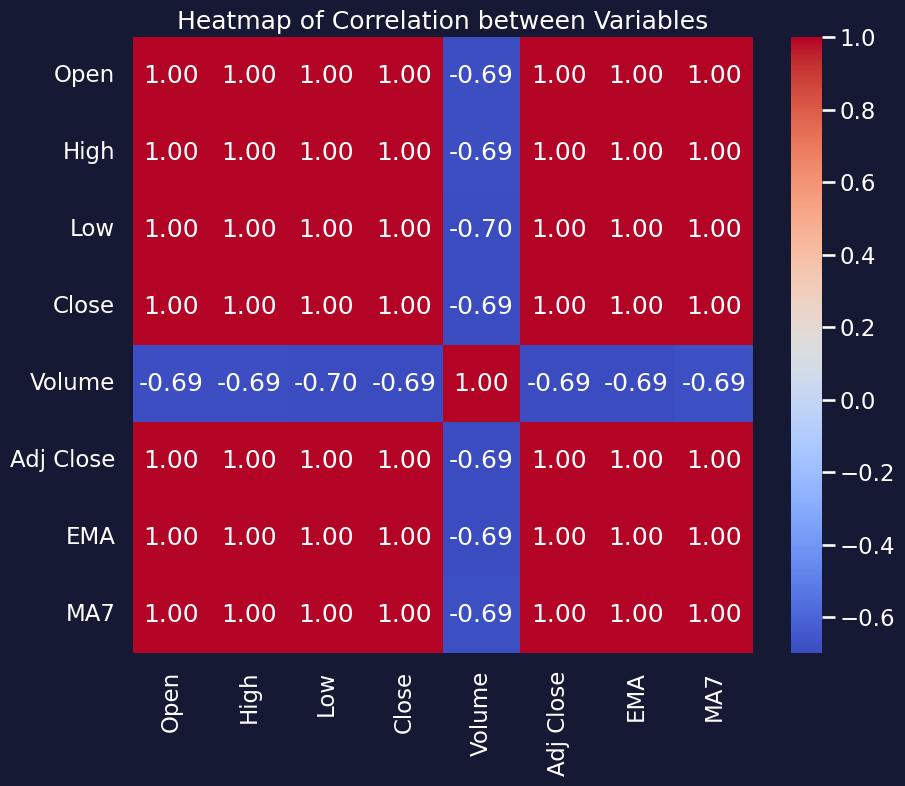

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))  # Adjust the size of the figure as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Add a title to the heatmap
plt.title('Heatmap of Correlation between Variables')

# Show the heatmap
plt.show()


In [10]:
# Only want closing price for each day
prices = pd.DataFrame(df["Close"]).rename(columns={"Close": "Price"})
prices.head()

Price
Date                    
2008-08-18  11479.389648
2008-08-19  11348.549805
2008-08-20  11417.429688
2008-08-21  11430.209961
2008-08-22  11628.059570

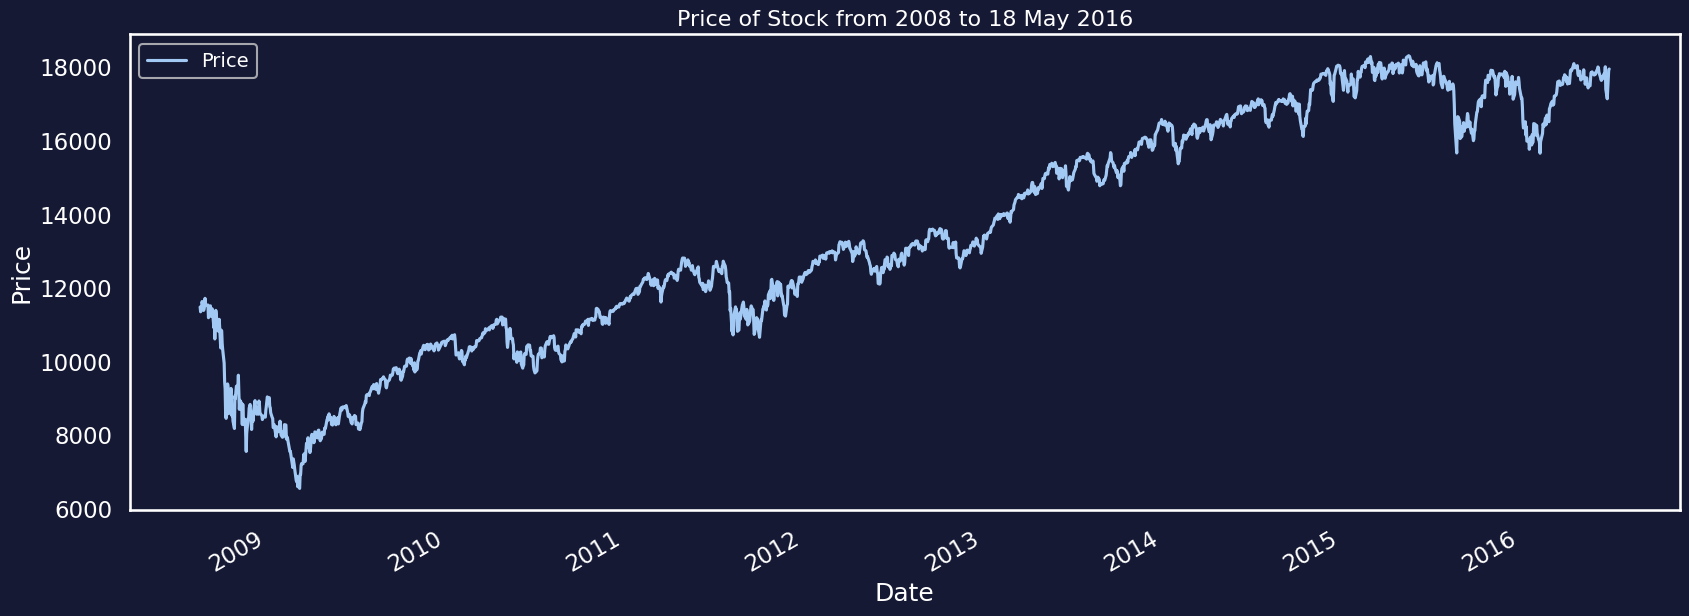

In [11]:
import matplotlib.pyplot as plt
prices.plot(figsize=(20, 7))
plt.ylabel("Price")
plt.title("Price of Stock from 2008 to 18 May 2016", fontsize=16)
plt.legend(fontsize=14);

In [12]:
# Importing and formatting historical Bitcoin data with Python
import csv
from datetime import datetime

timesteps = []
price = []
with open("/content/upload_DJIA_table (1).csv", "r") as f:
  csv_reader = csv.reader(f, delimiter=",") # read in the target CSV
  next(csv_reader) # skip first line (this gets rid of the column titles)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[0], "%Y-%m-%d")) # get the dates as dates (not strings), strptime = string parse time
    price.append(float(line[4])) # get the closing price as float

# View first 10 of each

timesteps = timesteps[::-1]

price = price[::-1]
timesteps[:10], price[:10]

([datetime.datetime(2008, 8, 8, 0, 0),
  datetime.datetime(2008, 8, 11, 0, 0),
  datetime.datetime(2008, 8, 12, 0, 0),
  datetime.datetime(2008, 8, 13, 0, 0),
  datetime.datetime(2008, 8, 14, 0, 0),
  datetime.datetime(2008, 8, 15, 0, 0),
  datetime.datetime(2008, 8, 18, 0, 0),
  datetime.datetime(2008, 8, 19, 0, 0),
  datetime.datetime(2008, 8, 20, 0, 0),
  datetime.datetime(2008, 8, 21, 0, 0)],
 [11734.320312,
  11782.349609,
  11642.469727,
  11532.959961,
  11615.929688,
  11659.900391,
  11479.389648,
  11348.549805,
  11417.429688,
  11430.209961])

In [13]:
# Get bitcoin date array
timesteps = prices.index.to_numpy()
prices = prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2008-08-18T00:00:00.000000000', '2008-08-19T00:00:00.000000000',
        '2008-08-20T00:00:00.000000000', '2008-08-21T00:00:00.000000000',
        '2008-08-22T00:00:00.000000000', '2008-08-25T00:00:00.000000000',
        '2008-08-26T00:00:00.000000000', '2008-08-27T00:00:00.000000000',
        '2008-08-28T00:00:00.000000000', '2008-08-29T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([11479.389648, 11348.549805, 11417.429688, 11430.209961,
        11628.05957 , 11386.25    , 11412.870117, 11502.509766,
        11715.179688, 11543.959961]))

In [14]:
from sklearn.model_selection import train_test_split


In [15]:
# Create train and test splits the right way for time series data
split_size = int(0.8 * len(prices)) # 80% train, 20% test

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything after the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(1586, 397, 1586, 397)

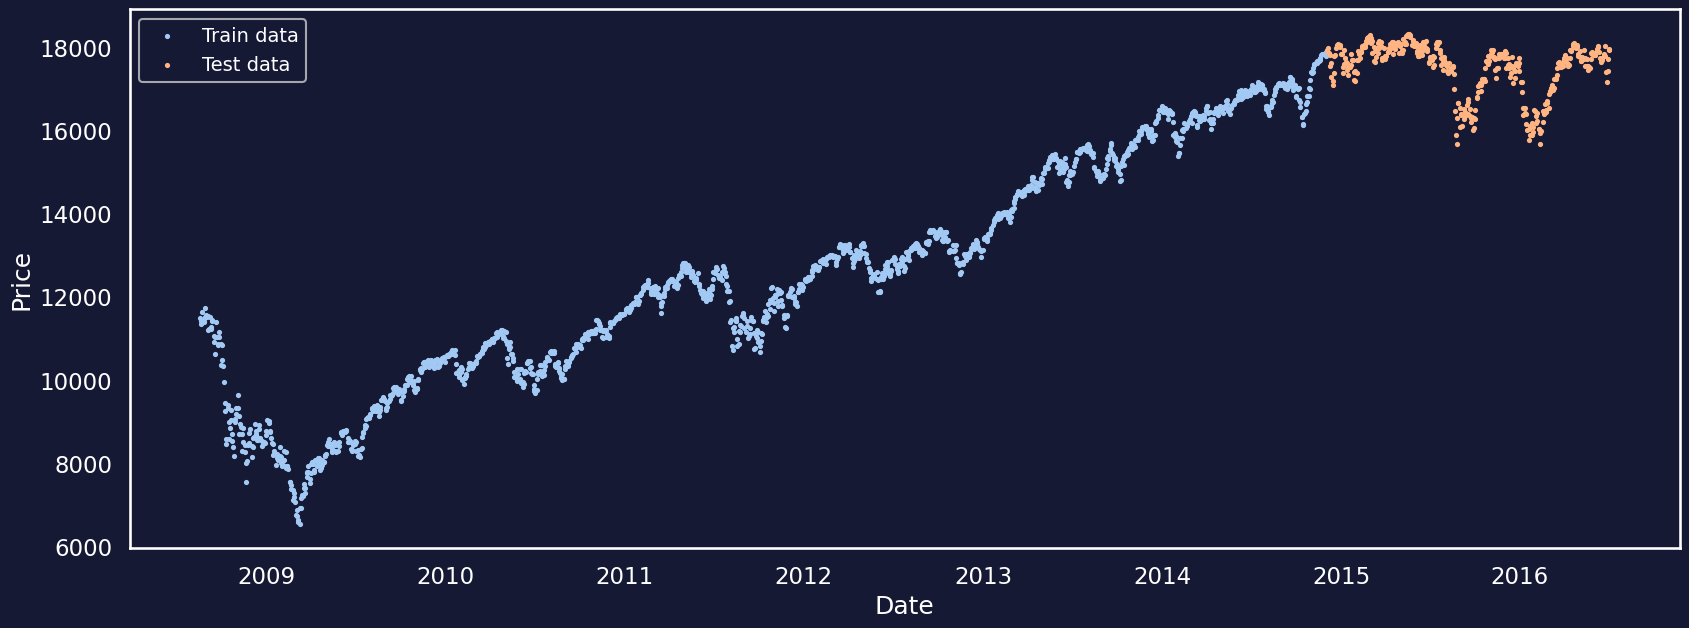

In [16]:
# Plot correctly made splits
plt.figure(figsize=(20, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend(fontsize=14)
plt.show();

In [17]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).

  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("DJIA Stock Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

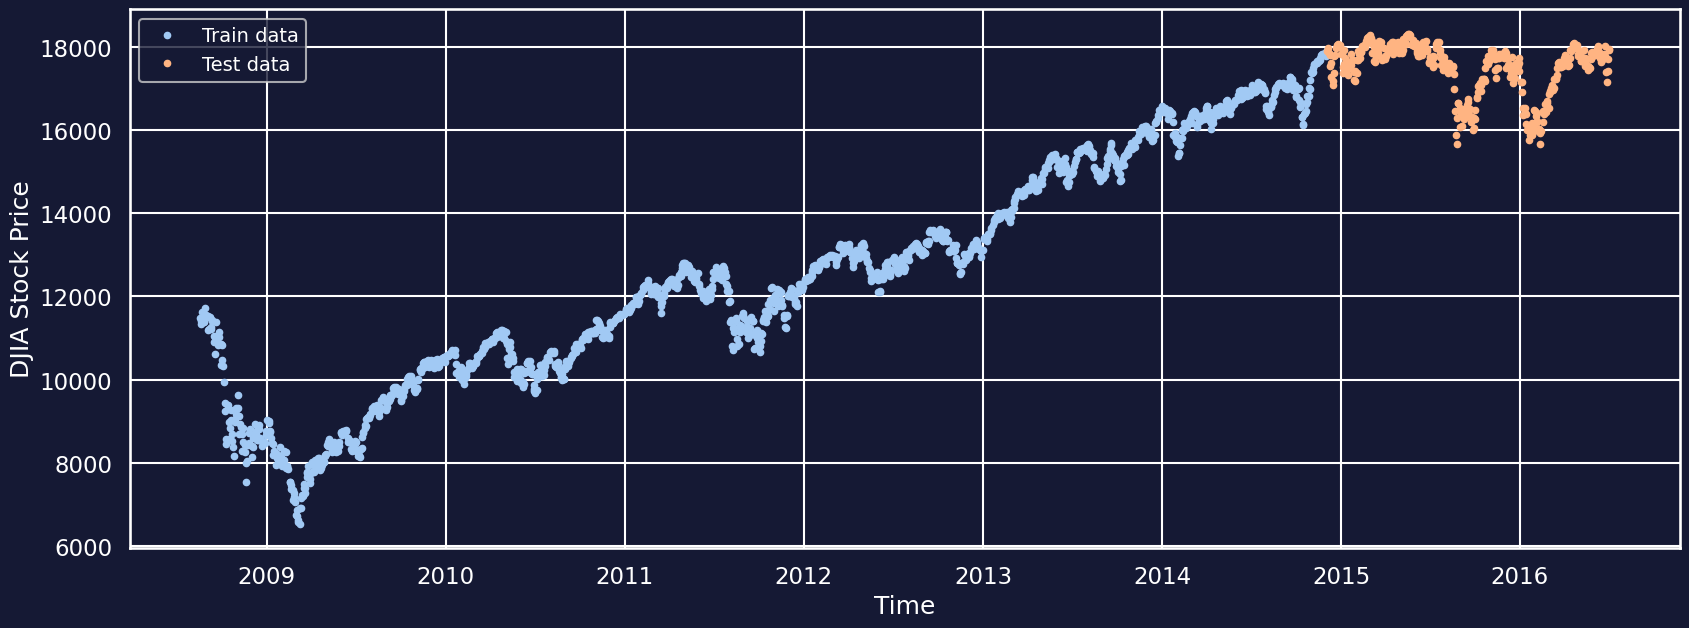

In [18]:
# Try out our plotting function
plt.figure(figsize=(20, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

In [19]:
# Create a naïve forecast
naive_forecast = y_test[:-1] # Naïve forecast equals every value excluding the last value
naive_forecast[:10], naive_forecast[-10:] # View frist 10 and last 10

(array([17900.099609, 17958.789062, 17852.480469, 17801.199219,
        17533.150391, 17596.339844, 17280.830078, 17180.839844,
        17068.869141, 17356.869141]),
 array([17675.160156, 17804.869141, 17829.730469, 17780.830078,
        18011.070312, 17400.75    , 17140.240234, 17409.720703,
        17694.679688, 17929.990234]))

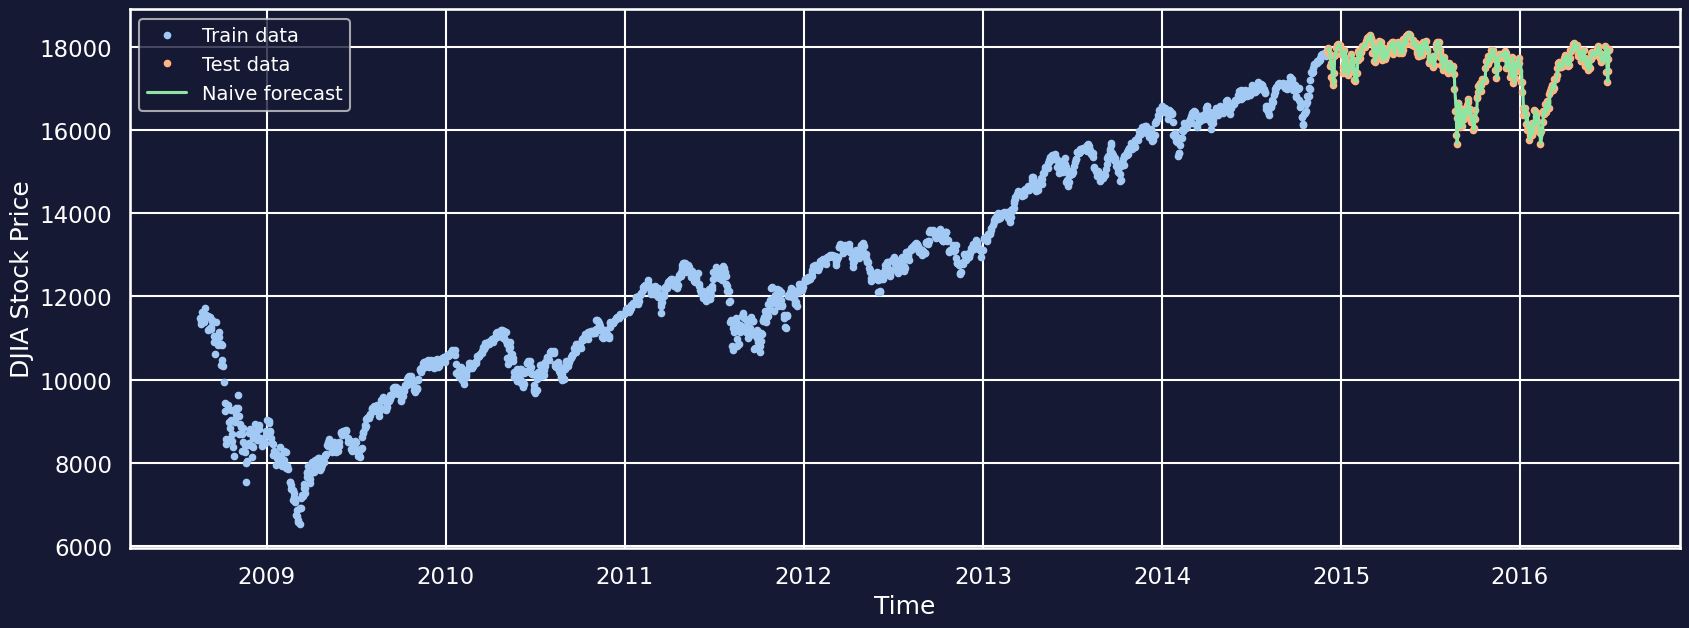

In [20]:
# Plot naive forecast
plt.figure(figsize=(20, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive forecast");

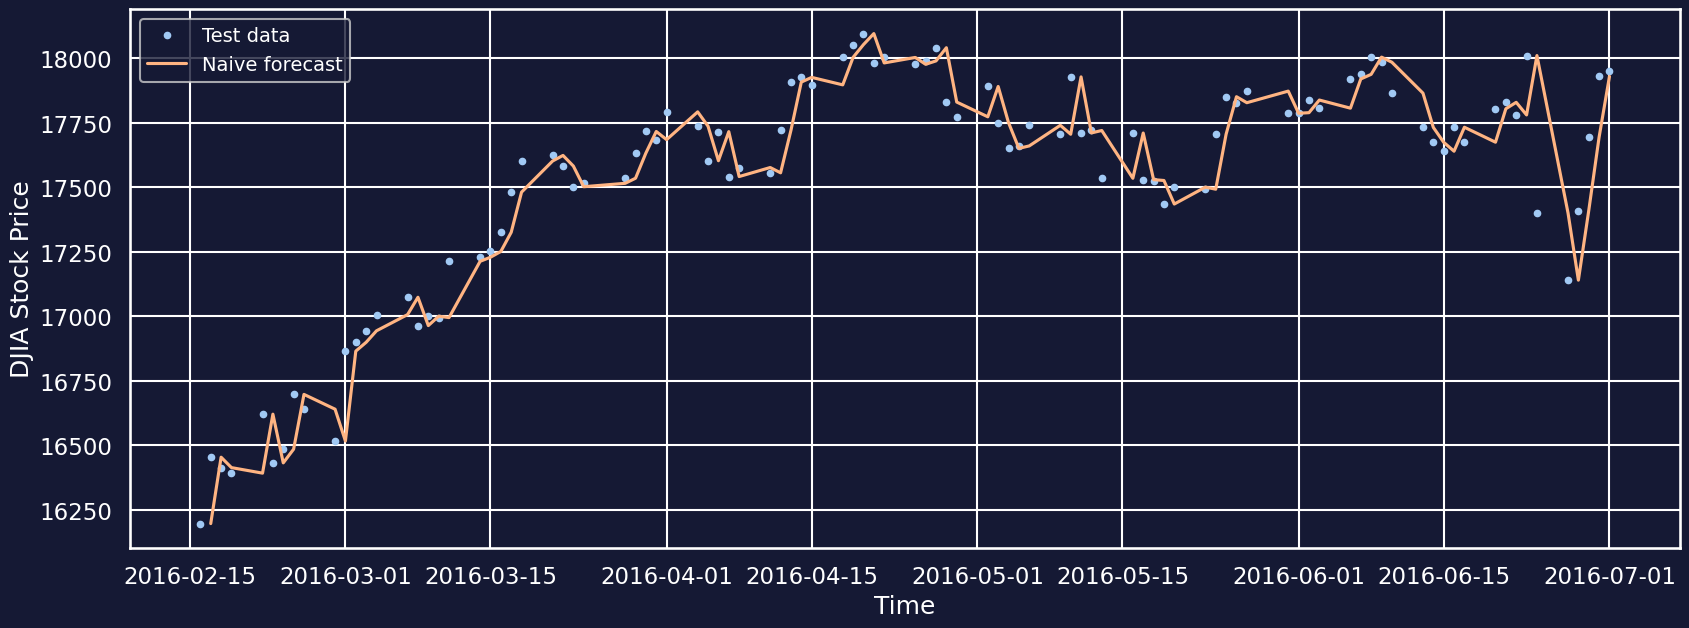

In [21]:
plt.figure(figsize=(20, 7))
offset = 300 # offset the values by 300 timesteps
plot_time_series(timesteps=X_test, values=y_test, start=offset, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", start=offset, label="Naive forecast");

In [22]:
# Example use
naive_results = evaluate_preds(y_true=y_test[1:], y_pred=naive_forecast)
naive_results

{'mae': 125.68157,
 'mse': 27671.523,
 'rmse': 166.3476,
 'mape': 0.7280941,
 'mase': 0.9986524}

In [23]:
# Find average price in test dataset
tf.reduce_mean(y_test).numpy()

17481.718676214106

In [24]:
df = df[["Open", "High","Low", "Close"]]

df['EMA'] = df['Close'].ewm(com=0.5).mean()
df['MA7'] = df['Close'].rolling(window=7).mean() #Close column
#df['MA20'] = df['Price'].rolling(window=20).mean() #Close Column


#Drop NaN Values
df = df.dropna()
df

Open          High           Low         Close  \
Date                                                                 
2008-08-26  11383.559570  11436.240234  11340.410156  11412.870117   
2008-08-27  11412.459961  11554.459961  11381.769531  11502.509766   
2008-08-28  11499.870117  11715.179688  11499.790039  11715.179688   
2008-08-29  11713.230469  11713.230469  11543.389648  11543.959961   
2008-09-02  11545.629883  11790.169922  11471.900391  11516.919922   
...                  ...           ...           ...           ...   
2016-06-27  17355.210938  17355.210938  17063.080078  17140.240234   
2016-06-28  17190.509766  17409.720703  17190.509766  17409.720703   
2016-06-29  17456.019531  17704.509766  17456.019531  17694.679688   
2016-06-30  17712.759766  17930.609375  17711.800781  17929.990234   
2016-07-01  17924.240234  18002.380859  17916.910156  17949.369141   

                     EMA           MA7  
Date                                    
2008-08-26  11423.249282  11443.251256  
2008-08-27  11476.097660  11446.554130  
2008-08-28  11635.493777  11498.929827  
2008-08-29  11574.470199  11517.005580  
2008-09-02  11536.103131  11529.392718  
...                  ...           ...  
2016-06-27  17286.702282  17663.235770  
2016-06-28  17368.714563  17625.315848  
2016-06-29  17586.024646  17609.574498  
2016-06-30  17815.335038  17623.897321  
2016-07-01  17904.691107  17647.974330  

[1977 rows x 6 columns]

In [25]:
df_1 = df
WINDOW_SIZE = 1
# Make a copy of the Bitcoin historical data with block reward feature
bitcoin_prices_windowed = df_1.copy()

# Add windowed columns
for i in range(WINDOW_SIZE): # Shift values for each step in WINDOW_SIZE
  bitcoin_prices_windowed[f"Close+{i+1}"] = bitcoin_prices_windowed["Close"].shift(periods=i+1)
bitcoin_prices_windowed = bitcoin_prices_windowed.dropna()
#bitcoin_prices_windowed[f"c+{-1}"] = bitcoin_prices_windowed["c"].shift(periods=-1)

#Close

bitcoin_prices_windowed[f"Close	+{-1}"] = bitcoin_prices_windowed["Close"].shift(periods=-1)
bitcoin_prices_windowed.rename(columns={'Close\t+-1': 'Close Price'}, inplace=True)

#bitcoin_prices_windowed.rename(columns={'c+-1': 'Close'}, inplace=True)

In [26]:
bitcoin_prices_windowed.head(5)

Open          High           Low         Close  \
Date                                                                 
2008-08-27  11412.459961  11554.459961  11381.769531  11502.509766   
2008-08-28  11499.870117  11715.179688  11499.790039  11715.179688   
2008-08-29  11713.230469  11713.230469  11543.389648  11543.959961   
2008-09-02  11545.629883  11790.169922  11471.900391  11516.919922   
2008-09-03  11506.009766  11554.379883  11416.530273  11532.879883   

                     EMA           MA7       Close+1   Close Price  
Date                                                                
2008-08-27  11476.097660  11446.554130  11412.870117  11715.179688  
2008-08-28  11635.493777  11498.929827  11502.509766  11543.959961  
2008-08-29  11574.470199  11517.005580  11715.179688  11516.919922  
2008-09-02  11536.103131  11529.392718  11543.959961  11532.879883  
2008-09-03  11533.954295  11515.795620  11516.919922  11188.230469

In [27]:
bitcoin_prices_windowed.tail(5)

Open          High           Low         Close  \
Date                                                                 
2016-06-27  17355.210938  17355.210938  17063.080078  17140.240234   
2016-06-28  17190.509766  17409.720703  17190.509766  17409.720703   
2016-06-29  17456.019531  17704.509766  17456.019531  17694.679688   
2016-06-30  17712.759766  17930.609375  17711.800781  17929.990234   
2016-07-01  17924.240234  18002.380859  17916.910156  17949.369141   

                     EMA           MA7       Close+1   Close Price  
Date                                                                
2016-06-27  17286.702282  17663.235770  17400.750000  17409.720703  
2016-06-28  17368.714563  17625.315848  17140.240234  17694.679688  
2016-06-29  17586.024646  17609.574498  17409.720703  17929.990234  
2016-06-30  17815.335038  17623.897321  17694.679688  17949.369141  
2016-07-01  17904.691107  17647.974330  17929.990234           NaN

In [28]:
# Let's create X & y, remove the NaN's and convert to float32 to prevent TensorFlow errors
X = bitcoin_prices_windowed.dropna().drop("Close Price", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Close Price"].astype(np.float32)
X.head()


Open          High           Low         Close  \
Date                                                                 
2008-08-27  11412.459961  11554.459961  11381.769531  11502.509766   
2008-08-28  11499.870117  11715.179688  11499.790039  11715.179688   
2008-08-29  11713.230469  11713.230469  11543.389648  11543.959961   
2008-09-02  11545.629883  11790.169922  11471.900391  11516.919922   
2008-09-03  11506.009766  11554.379883  11416.530273  11532.879883   

                     EMA           MA7       Close+1  
Date                                                  
2008-08-27  11476.097656  11446.553711  11412.870117  
2008-08-28  11635.494141  11498.929688  11502.509766  
2008-08-29  11574.469727  11517.005859  11715.179688  
2008-09-02  11536.103516  11529.392578  11543.959961  
2008-09-03  11533.954102  11515.795898  11516.919922

In [29]:
y.head(5)

Date
2008-08-27    11715.179688
2008-08-28    11543.959961
2008-08-29    11516.919922
2008-09-02    11532.879883
2008-09-03    11188.230469
Name: Close Price, dtype: float32

In [30]:

split_size = int(len(X) * 0.8)

X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)


(1580, 1580, 395, 395)

In [31]:
x_train = X_train.to_numpy()
y_train = y_train.to_numpy()
x_test  = X_test.to_numpy()
y_test  = y_test.to_numpy()


In [32]:
bitcoin_prices_windowed

Open          High           Low         Close  \
Date                                                                 
2008-08-27  11412.459961  11554.459961  11381.769531  11502.509766   
2008-08-28  11499.870117  11715.179688  11499.790039  11715.179688   
2008-08-29  11713.230469  11713.230469  11543.389648  11543.959961   
2008-09-02  11545.629883  11790.169922  11471.900391  11516.919922   
2008-09-03  11506.009766  11554.379883  11416.530273  11532.879883   
...                  ...           ...           ...           ...   
2016-06-27  17355.210938  17355.210938  17063.080078  17140.240234   
2016-06-28  17190.509766  17409.720703  17190.509766  17409.720703   
2016-06-29  17456.019531  17704.509766  17456.019531  17694.679688   
2016-06-30  17712.759766  17930.609375  17711.800781  17929.990234   
2016-07-01  17924.240234  18002.380859  17916.910156  17949.369141   

                     EMA           MA7       Close+1   Close Price  
Date                                                                
2008-08-27  11476.097660  11446.554130  11412.870117  11715.179688  
2008-08-28  11635.493777  11498.929827  11502.509766  11543.959961  
2008-08-29  11574.470199  11517.005580  11715.179688  11516.919922  
2008-09-02  11536.103131  11529.392718  11543.959961  11532.879883  
2008-09-03  11533.954295  11515.795620  11516.919922  11188.230469  
...                  ...           ...           ...           ...  
2016-06-27  17286.702282  17663.235770  17400.750000  17409.720703  
2016-06-28  17368.714563  17625.315848  17140.240234  17694.679688  
2016-06-29  17586.024646  17609.574498  17409.720703  17929.990234  
2016-06-30  17815.335038  17623.897321  17694.679688  17949.369141  
2016-07-01  17904.691107  17647.974330  17929.990234           NaN  

[1976 rows x 8 columns]

In [33]:
# Convert data to integers
X_all = bitcoin_prices_windowed.drop(["Close Price"], axis=1).dropna().to_numpy().astype(int)
y_all = bitcoin_prices_windowed.dropna()["Close Price"].to_numpy().astype(int)

# Turn X and y into tensor Datasets
features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

# Combine features & labels
dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

# Batch and prefetch for optimal performance
BATCH_SIZE = 16
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.int64, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [34]:
X_all

array([[11412, 11554, 11381, ..., 11476, 11446, 11412],
       [11499, 11715, 11499, ..., 11635, 11498, 11502],
       [11713, 11713, 11543, ..., 11574, 11517, 11715],
       ...,
       [17456, 17704, 17456, ..., 17586, 17609, 17409],
       [17712, 17930, 17711, ..., 17815, 17623, 17694],
       [17924, 18002, 17916, ..., 17904, 17647, 17929]])

In [35]:
last_window = X_all[-1:]
last_window.shape[1]

7

In [36]:
# How many timesteps to predict into the future?
INTO_FUTURE = 1 # since our Bitcoin data is daily, this is for 14 days

In [37]:
future_forecast = []
last_window = X_all[-1:]

In [38]:
last_window

array([[17924, 18002, 17916, 17949, 17904, 17647, 17929]])

# CNN

In [39]:
split_size = int(len(X) * 0.8)

X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(1580, 1580, 395, 395)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 30552.9160 - mae: 133.1307
Test Mean Absolute Error: 132.9823760986328


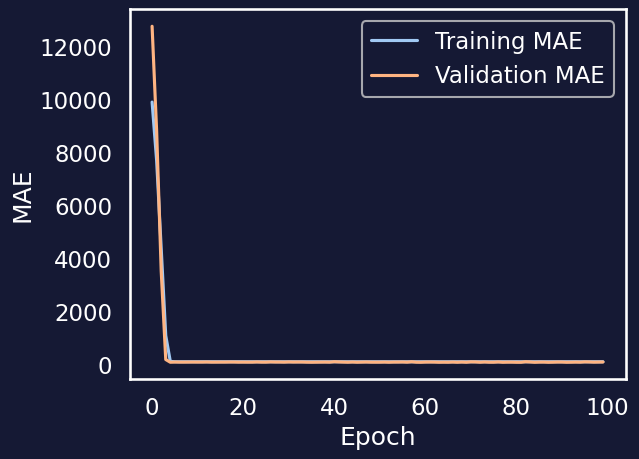

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


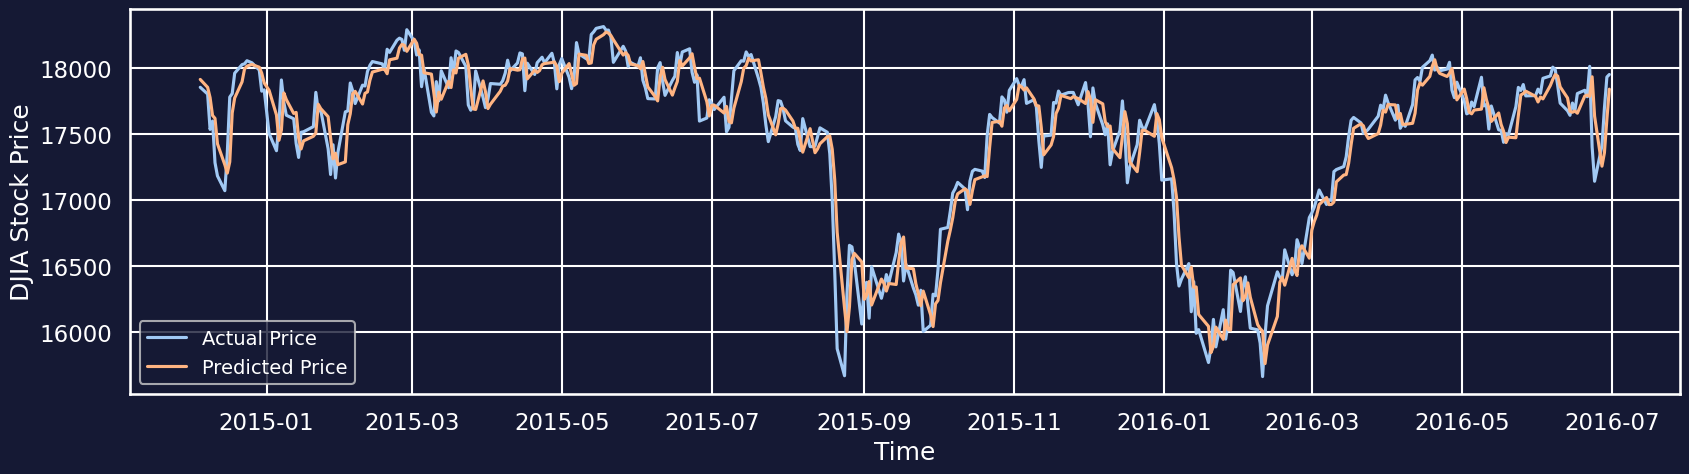

In [40]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam

# Assuming x_train, y_train, x_test, and y_test are prepared as per the instructions

# Align the indices of x_train and y_train
min_samples_train = min(len(x_train), len(y_train))
x_train_aligned = x_train[:min_samples_train]
y_train_aligned = y_train[:min_samples_train]

# Align the indices of x_test and y_test
min_samples_test = min(len(x_test), len(y_test))
x_test_aligned = x_test[:min_samples_test]
y_test_aligned = y_test[:min_samples_test]

# Reshape the input data for CNN
x_train_reshaped = x_train_aligned.reshape((x_train_aligned.shape[0], x_train_aligned.shape[1], 1))
x_test_reshaped = x_test_aligned.reshape((x_test_aligned.shape[0], x_test_aligned.shape[1], 1))

# Define the CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(x_train_aligned.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))

# Adjusted learning rate
learning_rate = 0.0001

# Compile the model
model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss='mean_squared_error',
              metrics=['mae'])

# Train the model
history = model.fit(x_train_reshaped, y_train_aligned, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(x_test_reshaped, y_test_aligned)
print(f'Test Mean Absolute Error: {test_mae}')

# Plot training history (optional)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()

# Make predictions on the test set
predictions = model.predict(x_test_reshaped)

# Ensure predictions and true values are 1-dimensional arrays
predictions = predictions.flatten()
y_test_aligned_flat = y_test_aligned[:len(predictions)].to_numpy().flatten()

# Plot future price predictions
plt.figure(figsize=(20, 5))
plot_time_series(y_test_aligned.index[:len(predictions)], y_test_aligned_flat, format="-", label="Actual Price")
plot_time_series(y_test_aligned.index[:len(predictions)], predictions, format="-", label="Predicted Price")

In [41]:
# Evaluate the model's predictions
CNN_model_results = evaluate_preds(y_true=y_test_aligned_flat, y_pred=predictions)
CNN_model_results

{'mae': 132.98238,
 'mse': 31218.78,
 'rmse': 176.68837,
 'mape': 0.7703759,
 'mase': 1.0562476}

In [42]:
# Compare different model results (w = window, h = horizon, e.g. w=7 means a window size of 7)
model_results = pd.DataFrame({"naive_model": naive_results,
                              "CNN_results": CNN_model_results}).T
model_results

mae           mse        rmse      mape      mase
naive_model  125.681572  27671.523438  166.347595  0.728094  0.998652
CNN_results  132.982376  31218.779297  176.688370  0.770376  1.056248

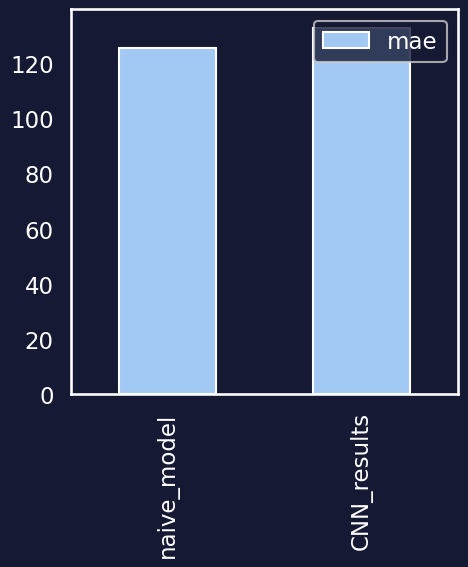

In [43]:
# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(5, 5), kind="bar");

# Clean Text data

In [44]:
final_data = pd.read_csv(r"/content/data.csv")

In [45]:
final_data.head(2)

Date  Label                                               Top1  \
0  2008-08-08      0  b"Georgia 'downs two Russian warplanes' as cou...   
1  2008-08-11      1  b'Why wont America and Nato help us? If they w...   

                                          Top2  \
0      b'BREAKING: Musharraf to be impeached.'   
1  b'Bush puts foot down on Georgian conflict'   

                                                Top3  \
0  b'Russia Today: Columns of troops roll into So...   
1  b"Jewish Georgian minister: Thanks to Israeli ...   

                                                Top4  \
0  b'Russian tanks are moving towards the capital...   
1  b'Georgian army flees in disarray as Russians ...   

                                                Top5  \
0  b"Afghan children raped with 'impunity,' U.N. ...   
1      b"Olympic opening ceremony fireworks 'faked'"   

                                                Top6  \
0  b'150 Russian tanks have entered South Ossetia...   
1  b'What were the Mossad with fraudulent New Zea...   

                                                Top7  \
0  b"Breaking: Georgia invades South Ossetia, Rus...   
1  b'Russia angered by Israeli military sale to G...   

                                                Top8  ...  \
0  b"The 'enemy combatent' trials are nothing but...  ...   
1  b'An American citizen living in S.Ossetia blam...  ...   

                                               Top24  \
0  b'Visitors Suffering from Mental Illnesses Ban...   
1                 b'Russia is so much better at war'   

                                               Top25          Open  \
0           b"No Help for Mexico's Kidnapping Surge"  11432.089844   
1  b"So this is what it's come to: trading sex fo...  11729.669922   

           High           Low         Close     Volume     Adj Close  \
0  11759.959961  11388.040039  11734.320312  212830000  11734.320312   
1  11867.110352  11675.530273  11782.349609  183190000  11782.349609   

                                        cleaned_data  \
0  georgia russian airplan countri brink war brea...   
1  america nato help help help iraq bush foot geo...   

                                          spellcheck  
0  georgia russian airplane country brink war bre...  
1  america nato help help help iraq bush foot geo...  

[2 rows x 35 columns]

In [46]:
sent_df = final_data.copy()


In [47]:
data1_new = sent_df.set_index('Date')

In [48]:
data1_new.head(2)

Label                                               Top1  \
Date                                                                   
2008-08-08      0  b"Georgia 'downs two Russian warplanes' as cou...   
2008-08-11      1  b'Why wont America and Nato help us? If they w...   

                                                   Top2  \
Date                                                      
2008-08-08      b'BREAKING: Musharraf to be impeached.'   
2008-08-11  b'Bush puts foot down on Georgian conflict'   

                                                         Top3  \
Date                                                            
2008-08-08  b'Russia Today: Columns of troops roll into So...   
2008-08-11  b"Jewish Georgian minister: Thanks to Israeli ...   

                                                         Top4  \
Date                                                            
2008-08-08  b'Russian tanks are moving towards the capital...   
2008-08-11  b'Georgian army flees in disarray as Russians ...   

                                                         Top5  \
Date                                                            
2008-08-08  b"Afghan children raped with 'impunity,' U.N. ...   
2008-08-11      b"Olympic opening ceremony fireworks 'faked'"   

                                                         Top6  \
Date                                                            
2008-08-08  b'150 Russian tanks have entered South Ossetia...   
2008-08-11  b'What were the Mossad with fraudulent New Zea...   

                                                         Top7  \
Date                                                            
2008-08-08  b"Breaking: Georgia invades South Ossetia, Rus...   
2008-08-11  b'Russia angered by Israeli military sale to G...   

                                                         Top8  \
Date                                                            
2008-08-08  b"The 'enemy combatent' trials are nothing but...   
2008-08-11  b'An American citizen living in S.Ossetia blam...   

                                                         Top9  ...  \
Date                                                           ...   
2008-08-08  b'Georgian troops retreat from S. Osettain cap...  ...   
2008-08-11  b'Welcome To World War IV! Now In High Definit...  ...   

                                                        Top24  \
Date                                                            
2008-08-08  b'Visitors Suffering from Mental Illnesses Ban...   
2008-08-11                 b'Russia is so much better at war'   

                                                        Top25          Open  \
Date                                                                          
2008-08-08           b"No Help for Mexico's Kidnapping Surge"  11432.089844   
2008-08-11  b"So this is what it's come to: trading sex fo...  11729.669922   

                    High           Low         Close     Volume     Adj Close  \
Date                                                                            
2008-08-08  11759.959961  11388.040039  11734.320312  212830000  11734.320312   
2008-08-11  11867.110352  11675.530273  11782.349609  183190000  11782.349609   

                                                 cleaned_data  \
Date                                                            
2008-08-08  georgia russian airplan countri brink war brea...   
2008-08-11  america nato help help help iraq bush foot geo...   

                                                   spellcheck  
Date                                                           
2008-08-08  georgia russian airplane country brink war bre...  
2008-08-11  america nato help help help iraq bush foot geo...  

[2 rows x 34 columns]

In [49]:
final_df = data1_new[['Close',"spellcheck"]]

In [50]:
final_spell = data1_new[["spellcheck"]]

In [51]:
final_df = data1_new[['Close']]

In [52]:
final_df

Close
Date                    
2008-08-08  11734.320312
2008-08-11  11782.349609
2008-08-12  11642.469727
2008-08-13  11532.959961
2008-08-14  11615.929688
...                  ...
2016-06-27  17140.240234
2016-06-28  17409.720703
2016-06-29  17694.679688
2016-06-30  17929.990234
2016-07-01  17949.369141

[1989 rows x 1 columns]

In [53]:
def get_tech_ind(data):
    data['MA7'] = data.iloc[:,0].rolling(window=7).mean() #Close column
    data['MA20'] = data.iloc[:,0].rolling(window=20).mean() #Close Column

    data['MACD'] = data.iloc[:,0].ewm(span=26).mean() - data.iloc[:,1].ewm(span=12,adjust=False).mean()
    #This is the difference of Closing price and Opening Price

    # Create Bollinger Bands
    data['20SD'] = data.iloc[:, 0].rolling(20).std()
    data['upper_band'] = data['MA20'] + (data['20SD'] * 2)
    data['lower_band'] = data['MA20'] - (data['20SD'] * 2)

    # Create Exponential moving average
    data['EMA'] = data.iloc[:,0].ewm(com=0.5).mean()

    return data

In [54]:
tech_df = get_tech_ind(final_df)
dataset = tech_df.iloc[20:,:]
dataset.head()

Close           MA7          MA20       MACD        20SD  \
Date                                                                          
2008-09-08  11510.740234  11461.267160  11503.387402 -23.789161  151.597006   
2008-09-09  11230.730469  11392.060128  11475.806445 -29.334960  148.316713   
2008-09-10  11268.919922  11352.768694  11457.128955 -25.654980  149.737930   
2008-09-11  11433.709961  11340.881557  11452.166455  -7.070017  148.733794   
2008-09-12  11421.990234  11325.040179  11442.469483  10.050858  143.733062   

              upper_band    lower_band           EMA  
Date                                                  
2008-09-08  11806.581414  11200.193391  11423.314793  
2008-09-09  11772.439871  11179.173020  11294.925244  
2008-09-10  11756.604816  11157.653094  11277.588363  
2008-09-11  11749.634043  11154.698867  11381.669428  
2008-09-12  11729.935607  11155.003358  11408.549965

In [55]:
final = pd.merge(dataset, final_spell, how='outer', on='Date')

In [56]:
final.head(5)

Close           MA7          MA20       MACD        20SD  \
Date                                                                          
2008-09-08  11510.740234  11461.267160  11503.387402 -23.789161  151.597006   
2008-09-09  11230.730469  11392.060128  11475.806445 -29.334960  148.316713   
2008-09-10  11268.919922  11352.768694  11457.128955 -25.654980  149.737930   
2008-09-11  11433.709961  11340.881557  11452.166455  -7.070017  148.733794   
2008-09-12  11421.990234  11325.040179  11442.469483  10.050858  143.733062   

              upper_band    lower_band           EMA  \
Date                                                   
2008-09-08  11806.581414  11200.193391  11423.314793   
2008-09-09  11772.439871  11179.173020  11294.925244   
2008-09-10  11756.604816  11157.653094  11277.588363   
2008-09-11  11749.634043  11154.698867  11381.669428   
2008-09-12  11729.935607  11155.003358  11408.549965   

                                                   spellcheck  
Date                                                           
2008-09-08  french judge order branch scientologist leader...  
2008-09-09  love world thai prime minister sama sundaravej...  
2008-09-10  dutch ban burial pick child school year britis...  
2008-09-11  american intellig confirm late military action...  
2008-09-12  open finish saudi arabia later putin strip cnn...

In [57]:
final = final.dropna()

In [58]:
training_news = final_spell

In [59]:
len(final_spell)

1989

In [60]:
split_size = int(len(final_spell) * 0.8)
train_news = training_news[:split_size]
train_news.head(5)

spellcheck
Date                                                         
2008-08-08  georgia russian airplane country brink war bre...
2008-08-11  america nato help help help iraq bush foot geo...
2008-08-12  remember adr year old sing open ceremony fake ...
2008-08-13  refs israel weapon attack iran report preside ...
2008-08-14  expert admit legal drug war south rosetta pict...

In [61]:
test_news = training_news[split_size:]
test_news.head(5)

spellcheck
Date                                                         
2014-12-03  british man find nailbomb weapon each plan mas...
2014-12-04  nasa office announce man mar mission test laun...
2014-12-05  orion deep space capsule launch dozen chinese ...
2014-12-08  mass survey expos snowden justify fight terror...
2014-12-09  hacker tell song halt release interview aleph ...

In [62]:
test_news.tail(5)

spellcheck
Date                                                         
2016-06-27  barely rb share suspend trade tank pope church...
2016-06-28  scientist australia want save great barrier re...
2016-06-29  expos airport istanbul yemen preside terror of...
2016-06-30  jamaica propos marijuana dispense tourist airp...
2016-07-01  year old woman mexico city final receive birth...

In [63]:
X = final.drop(columns=['Close', 'spellcheck'])
X

MA7          MA20       MACD        20SD    upper_band  \
Date                                                                          
2008-09-08  11461.267160  11503.387402 -23.789161  151.597006  11806.581414   
2008-09-09  11392.060128  11475.806445 -29.334960  148.316713  11772.439871   
2008-09-10  11352.768694  11457.128955 -25.654980  149.737930  11756.604816   
2008-09-11  11340.881557  11452.166455  -7.070017  148.733794  11749.634043   
2008-09-12  11325.040179  11442.469483  10.050858  143.733062  11729.935607   
...                  ...           ...        ...         ...           ...   
2016-06-27  17663.235770  17767.995019 -44.865946  205.436138  18178.867296   
2016-06-28  17625.315848  17749.121094 -46.806466  220.375674  18189.872442   
2016-06-29  17609.574498  17744.371582 -26.720515  220.479360  18185.330302   
2016-06-30  17623.897321  17748.943066   5.517607  223.462769  18195.868604   
2016-07-01  17647.974330  17756.058496  31.932074  227.637403  18211.333301   

              lower_band           EMA  
Date                                    
2008-09-08  11200.193391  11423.314793  
2008-09-09  11179.173020  11294.925244  
2008-09-10  11157.653094  11277.588363  
2008-09-11  11154.698867  11381.669428  
2008-09-12  11155.003358  11408.549965  
...                  ...           ...  
2016-06-27  17357.122743  17286.702282  
2016-06-28  17308.369746  17368.714563  
2016-06-29  17303.412862  17586.024646  
2016-06-30  17302.017529  17815.335038  
2016-07-01  17300.783691  17904.691107  

[1969 rows x 7 columns]

In [64]:
split_size = int(len(X) * 0.8)
train_news = training_news[:split_size]
train_news.head(5)

spellcheck
Date                                                         
2008-08-08  georgia russian airplane country brink war bre...
2008-08-11  america nato help help help iraq bush foot geo...
2008-08-12  remember adr year old sing open ceremony fake ...
2008-08-13  refs israel weapon attack iran report preside ...
2008-08-14  expert admit legal drug war south rosetta pict...

In [65]:
test_news = training_news[split_size:]
test_news.head(5)

spellcheck
Date                                                         
2014-11-10  pope france excommun pedophile argentina pries...
2014-11-11  geologist predict earthquake killer italian co...
2014-11-12  russian combat troop enter ukraine tank artill...
2014-11-13  european robot probe history land comet descen...
2014-11-14  sweden proof foreign sub enter water report lo...

In [66]:
X

MA7          MA20       MACD        20SD    upper_band  \
Date                                                                          
2008-09-08  11461.267160  11503.387402 -23.789161  151.597006  11806.581414   
2008-09-09  11392.060128  11475.806445 -29.334960  148.316713  11772.439871   
2008-09-10  11352.768694  11457.128955 -25.654980  149.737930  11756.604816   
2008-09-11  11340.881557  11452.166455  -7.070017  148.733794  11749.634043   
2008-09-12  11325.040179  11442.469483  10.050858  143.733062  11729.935607   
...                  ...           ...        ...         ...           ...   
2016-06-27  17663.235770  17767.995019 -44.865946  205.436138  18178.867296   
2016-06-28  17625.315848  17749.121094 -46.806466  220.375674  18189.872442   
2016-06-29  17609.574498  17744.371582 -26.720515  220.479360  18185.330302   
2016-06-30  17623.897321  17748.943066   5.517607  223.462769  18195.868604   
2016-07-01  17647.974330  17756.058496  31.932074  227.637403  18211.333301   

              lower_band           EMA  
Date                                    
2008-09-08  11200.193391  11423.314793  
2008-09-09  11179.173020  11294.925244  
2008-09-10  11157.653094  11277.588363  
2008-09-11  11154.698867  11381.669428  
2008-09-12  11155.003358  11408.549965  
...                  ...           ...  
2016-06-27  17357.122743  17286.702282  
2016-06-28  17308.369746  17368.714563  
2016-06-29  17303.412862  17586.024646  
2016-06-30  17302.017529  17815.335038  
2016-07-01  17300.783691  17904.691107  

[1969 rows x 7 columns]

In [67]:
y = final[['Close']]
y

Close
Date                    
2008-09-08  11510.740234
2008-09-09  11230.730469
2008-09-10  11268.919922
2008-09-11  11433.709961
2008-09-12  11421.990234
...                  ...
2016-06-27  17140.240234
2016-06-28  17409.720703
2016-06-29  17694.679688
2016-06-30  17929.990234
2016-07-01  17949.369141

[1969 rows x 1 columns]

In [68]:
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(1575, 1575, 394, 394)

In [69]:
x_train = X_train.to_numpy()
y_train = y_train.to_numpy()
x_test  = X_test.to_numpy()
y_test  = y_test.to_numpy()

# GPT

In [70]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer

In [71]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Concatenate
from tensorflow.keras.preprocessing.sequence import pad_sequences
from transformers import GPT2Tokenizer, TFGPT2Model

# Instantiate the GPT-2 tokenizer and model
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
model = TFGPT2Model.from_pretrained("gpt2")




tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFGPT2Model.

All the weights of TFGPT2Model were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2Model for predictions without further training.


In [72]:

corpus = train_news["spellcheck"]

In [73]:
corpus_test = test_news["spellcheck"]

In [74]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Encode text into token IDs
encoded_corpus = [tokenizer.encode(text, add_special_tokens=True) for text in corpus]

# Pad sequences to a specified length
max_length = 50  # Adjust this based on your requirements
padded_corpus_train = pad_sequences(encoded_corpus, maxlen=max_length, padding='post', truncating='post')

# Print the first padded sequence
print("Padded Sequence:", padded_corpus_train[0])

Padded Sequence: [  469  2398   544   374 31562 19401  1499 29585  1175  2270 15026   283
 32188 18516   620   374 31269  1909  5721 31874  4836  5366   267   824
   316   544  9640  1907 35116   374 31562  6873 21344  5366   267   824
   316   544  7478  1844  4117  4903  2398   544 20381  2046  6580  6064
  1200  7262]


In [75]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Encode text into token IDs
encoded_corpus = [tokenizer.encode(text, add_special_tokens=True) for text in corpus_test]

# Pad sequences to a specified length
max_length = 50  # Adjust this based on your requirements
padded_corpus_test = pad_sequences(encoded_corpus, maxlen=max_length, padding='post', truncating='post')

# Print the first padded sequence
print("Padded Sequence:", padded_corpus_test[0])

Padded Sequence: [   79  3008  1216   590   409 10709 27706   576  1822   298  1437 11503
  9159  3206  1323 16330  1263  2038  3331  3896 43784   649  3298  3896
  2948  3331  1263  2038 12274  1687    64  4218   479   292  1845 13645
  2245  1234   259  1414  2756  1568   410   541  3206  1323  2933  5475
  3716  1474]


In [76]:
import numpy as np

# Assuming you have numerical features (X_train, X_test) and encoded text sequences (padded_corpus_train, padded_corpus_test)

# Merge numerical features and encoded text sequences for training set
x_train_combined = np.concatenate([x_train, padded_corpus_train], axis=1)

# Merge numerical features and encoded text sequences for testing set
#x_test_combined = np.concatenate([x_test, padded_corpus_test], axis=1)

# Ensure the shapes are correct
print("Shape of x_train_combined:", x_train_combined.shape)
#print("Shape of x_test_combined:", x_test_combined.shape)

Shape of x_train_combined: (1575, 57)


In [77]:
x_test

array([[ 1.78687913e+04,  1.77717680e+04, -1.33097675e+02, ...,
         1.79858542e+04,  1.75576818e+04,  1.78278315e+04],
       [ 1.78339841e+04,  1.77676805e+04, -1.49477799e+02, ...,
         1.79969599e+04,  1.75384010e+04,  1.76313774e+04],
       [ 1.77935254e+04,  1.77668875e+04, -1.53130967e+02, ...,
         1.79985286e+04,  1.75352464e+04,  1.76080190e+04],
       ...,
       [ 1.76095745e+04,  1.77443716e+04, -2.67205154e+01, ...,
         1.81853303e+04,  1.73034129e+04,  1.75860246e+04],
       [ 1.76238973e+04,  1.77489431e+04,  5.51760710e+00, ...,
         1.81958686e+04,  1.73020175e+04,  1.78153350e+04],
       [ 1.76479743e+04,  1.77560585e+04,  3.19320743e+01, ...,
         1.82113333e+04,  1.73007837e+04,  1.79046911e+04]])

In [78]:
x_train_combined

array([[ 1.14612672e+04,  1.15033874e+04, -2.37891607e+01, ...,
         6.06400000e+03,  1.20000000e+03,  7.26200000e+03],
       [ 1.13920601e+04,  1.14758064e+04, -2.93349602e+01, ...,
         1.28000000e+03,  1.05420000e+04,  2.60560000e+04],
       [ 1.13527687e+04,  1.14571290e+04, -2.56549802e+01, ...,
         8.05000000e+02,  1.24960000e+04,  8.50000000e+01],
       ...,
       [ 1.78485714e+04,  1.77282516e+04, -1.33268216e+02, ...,
         9.11400000e+03,  5.21000000e+03,  2.05420000e+04],
       [ 1.78691214e+04,  1.77484675e+04, -1.27963674e+02, ...,
         2.46500000e+03,  1.64100000e+03,  5.82000000e+02],
       [ 1.78726543e+04,  1.77623950e+04, -1.29745801e+02, ...,
         3.81320000e+04,  1.37300000e+03,  5.44000000e+02]])

In [79]:
# Check the number of samples in each dataset
print("Number of samples in x_test:", x_test.shape[0])
print("Number of samples in padded_corpus_test:", padded_corpus_test.shape[0])

Number of samples in x_test: 394
Number of samples in padded_corpus_test: 414


In [80]:
min_samples = min(x_test.shape[0], padded_corpus_test.shape[0])

In [81]:
# Trim or pad the datasets
x_test = x_test[:min_samples]
padded_corpus_test = padded_corpus_test[:min_samples]

In [82]:
# Now, attempt the concatenation again
x_test_combined = np.concatenate([x_test, padded_corpus_test], axis=1)

In [83]:
# Check the shape after concatenation
print("Shape of x_test_combined:", x_test_combined.shape)

Shape of x_test_combined: (394, 57)


In [84]:
import numpy as np

# Assuming you have numerical features (X_train, X_test) and encoded text sequences (padded_corpus_train, padded_corpus_test)

# Merge numerical features and encoded text sequences for training set
x_train_combined = np.concatenate([x_train, padded_corpus_train], axis=1)

# Merge numerical features and encoded text sequences for testing set
x_test_combined = np.concatenate([x_test, padded_corpus_test], axis=1)

# Ensure the shapes are correct
print("Shape of x_train_combined:", x_train_combined.shape)
print("Shape of x_test_combined:", x_test_combined.shape)

Shape of x_train_combined: (1575, 57)
Shape of x_test_combined: (394, 57)


In [85]:
combined_input_dim = 57



# keras with No text embedding

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 6469.8774 - mae: 59.4984
Test Mean Absolute Error: 58.37118148803711


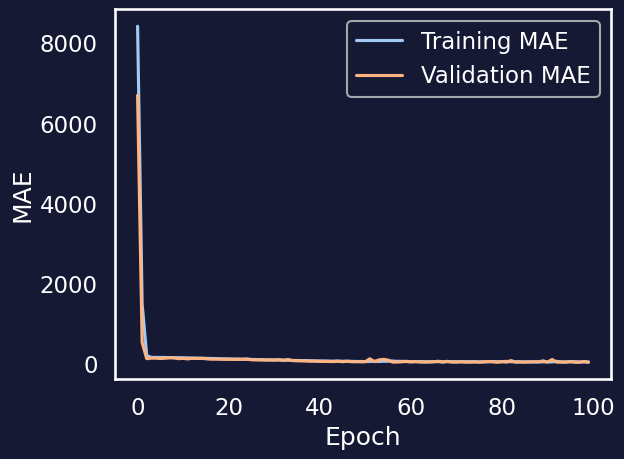

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6469.8774 - mae: 59.4984 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6469.8774 - mae: 59.4984 
Test Mean Absolute Error: 58.37118148803711


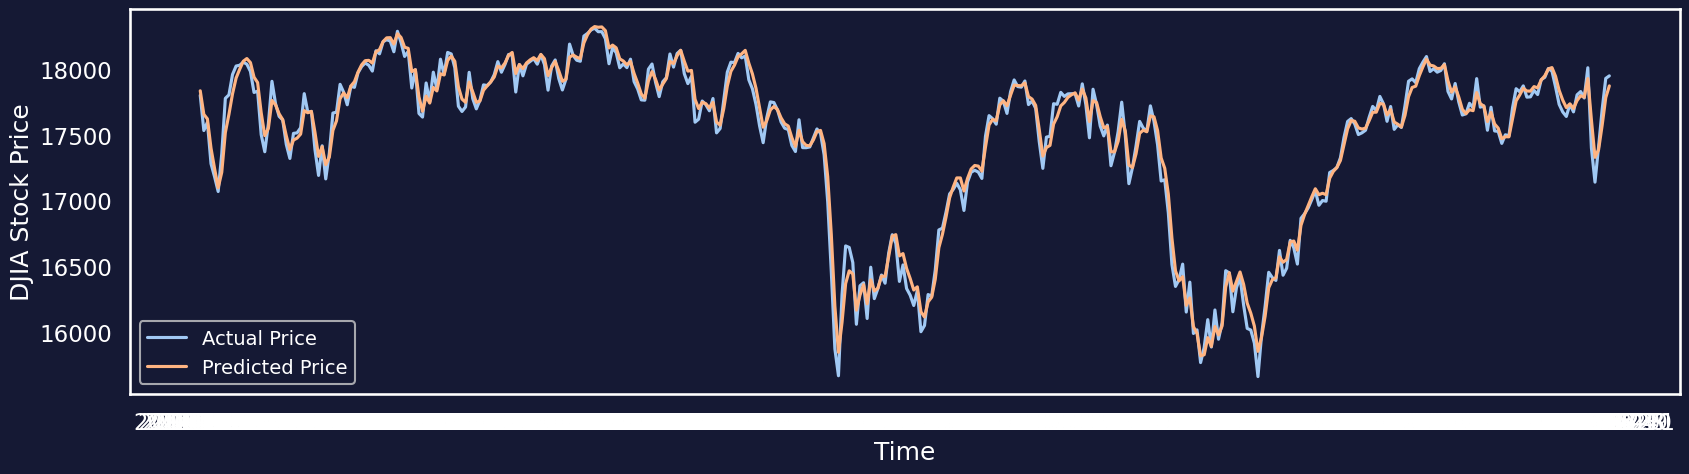

In [86]:
# prompt: build sequential model for no text embedding

# Define the model
model = Sequential()
model.add(Dense(512, activation='relu', input_dim=x_train.shape[1]))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))  # Use linear activation for regression

# Adjusted learning rate
learning_rate = 0.0001

# Compile the model
model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss='mean_squared_error',
              metrics=['mae'])

# Train the model
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(x_test, y_test)
print(f'Test Mean Absolute Error: {test_mae}')

# Plot training history (optional)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()

# Make predictions on the test set
predictions = model.predict(x_test).flatten()

model.evaluate(x_test,y_test)

# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(x_test, y_test)
print(f'Test Mean Absolute Error: {test_mae}')

X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

# Plot future price predictions of sts
plt.figure(figsize=(20, 5))
plot_time_series(y_test.index, y_test, format="-", label="Actual Price")
plot_time_series(y_test.index, predictions, format="-", label="Predicted Price")
plt.grid(False)

# Flatten y_test
y_test_flat = y_test.to_numpy().flatten()

In [87]:
# Evaluate the model's predictions
model_results_no_embedding = evaluate_preds(y_true=y_test, y_pred=predictions)
model_results_no_embedding


{'mae': 58.371193,
 'mse': 6212.989,
 'rmse': 78.82251,
 'mape': 0.3383089,
 'mase': 5.1502123}

{'mae': 58.371193, 'mse': 6212.989, 'rmse': 78.82251, 'mape': 0.3383089, 'mase': 5.1502123}


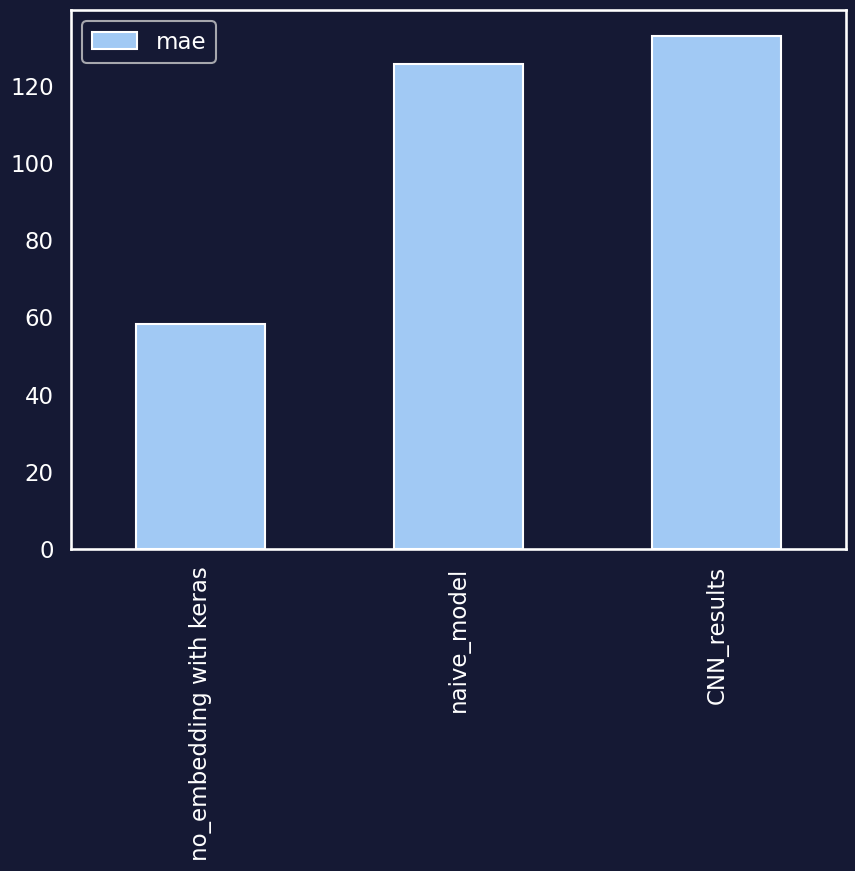

In [88]:
# Assuming evaluate_preds is a predefined function to evaluate predictions
model_results_no_embedding = evaluate_preds(y_true=y_test, y_pred=predictions)
print(model_results_no_embedding)

# Compare different model results (assuming naive_results, Keras_Sequential_Model_results, and CNN_model_results are predefined)
model_results = pd.DataFrame({"naive_model": naive_results,
                              "CNN_results": CNN_model_results,
                              "no_embedding with keras": model_results_no_embedding}).T

# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar")
plt.show()

# GPT2 with No text embedding

All PyTorch model weights were used when initializing TFGPT2Model.

All the weights of TFGPT2Model were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2Model for predictions without further training.


Epoch 1/3
40/40 ━━━━━━━━━━━━━━━━━━━━ 12s 144ms/step - loss: 123688104.0000 - mae: 10922.5576 - val_loss: 140780880.0000 - val_mae: 11854.9551
Epoch 2/3
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 56868352.0000 - mae: 7370.1934 - val_loss: 36836880.0000 - val_mae: 6062.2275
Epoch 3/3
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 11670002.0000 - mae: 3218.8391 - val_loss: 600838.3125 - val_mae: 752.7891
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 251ms/step


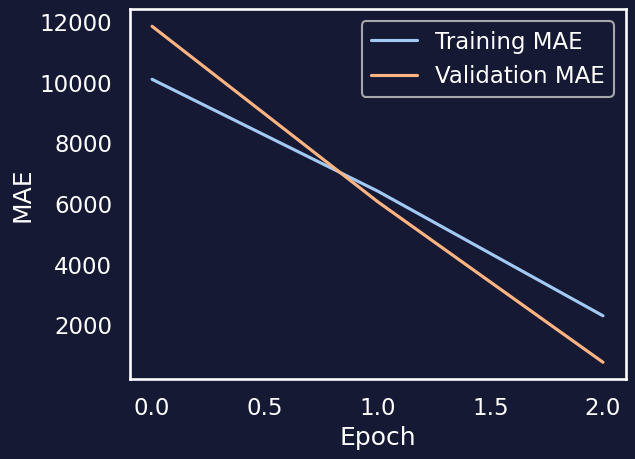

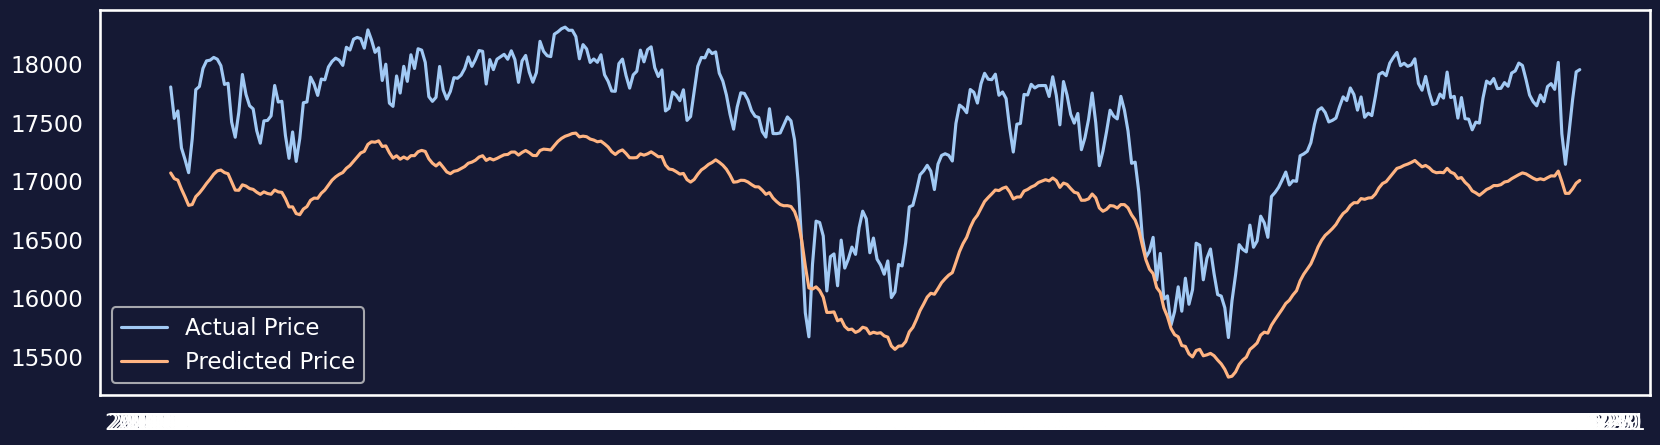

In [89]:
import tensorflow as tf
from transformers import GPT2Tokenizer, TFGPT2Model
from tensorflow.keras.layers import Input, Dense, Concatenate, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import matplotlib.pyplot as plt

# Load GPT-2 model and tokenizer
model_name = "gpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
gpt2_model = TFGPT2Model.from_pretrained(model_name)

# Tokenize and pad the text data (for both training and testing)
max_length = 50  # Max sequence length for GPT-2

# Assuming corpus and corpus_test are lists of text data
encoded_corpus_train = [tokenizer.encode(text, add_special_tokens=True) for text in corpus]
encoded_corpus_test = [tokenizer.encode(text, add_special_tokens=True) for text in corpus_test]

padded_corpus_train = pad_sequences(encoded_corpus_train, maxlen=max_length, padding='post', truncating='post')
padded_corpus_test = pad_sequences(encoded_corpus_test, maxlen=max_length, padding='post', truncating='post')

# Create attention masks for the text data
attention_masks_train = np.array([[float(i > 0) for i in seq] for seq in padded_corpus_train])
attention_masks_test = np.array([[float(i > 0) for i in seq] for seq in padded_corpus_test])

# Define input shapes for numerical and text data
numerical_input_shape = X_train.shape[1]  # Based on the numerical input dimensions
text_input_shape = max_length

# Numerical input layer
numerical_input = Input(shape=(numerical_input_shape,), name="numerical_input")

# Text input layers
text_input_ids = Input(shape=(text_input_shape,), dtype=tf.int32, name="text_input_ids")
text_attention_masks = Input(shape=(text_input_shape,), dtype=tf.float32, name="text_attention_masks")

# Lambda function to use GPT-2 model
def get_gpt2_embeddings(inputs):
    input_ids, attention_mask = inputs
    gpt2_outputs = gpt2_model(input_ids, attention_mask=attention_mask)
    gpt2_embeddings = gpt2_outputs.last_hidden_state[:, 0, :]  # Take the [CLS] token embedding
    return gpt2_embeddings

# Wrap the GPT-2 model in a Lambda layer
gpt2_embeddings_layer = Lambda(get_gpt2_embeddings)([text_input_ids, text_attention_masks])

# Define a function to zero out embeddings
def zero_out_embeddings(embedding_tensor):
    return tf.zeros_like(embedding_tensor)

# Zero out embeddings
gpt2_embeddings_layer = Lambda(zero_out_embeddings)(gpt2_embeddings_layer)

# Concatenate numerical and text embeddings
combined_input = Concatenate()([numerical_input, gpt2_embeddings_layer])

# Define dense layers for regression
dense_layer1 = Dense(256, activation='relu')(combined_input)
dense_layer2 = Dense(128, activation='relu')(dense_layer1)
dense_layer3 = Dense(64, activation='relu')(dense_layer2)
output_layer = Dense(1, activation='linear')(dense_layer3)

# Build the combined model
combined_model = Model(inputs=[numerical_input, text_input_ids, text_attention_masks], outputs=output_layer)

# Compile the model
learning_rate = 0.0001
combined_model.compile(optimizer=Adam(learning_rate=learning_rate),
                       loss='mean_squared_error',
                       metrics=['mae'])

# Train the model
history = combined_model.fit([X_train, padded_corpus_train, attention_masks_train],
                             y_train,
                             epochs=3,
                             batch_size=32,
                             validation_split=0.2)

# Align the sizes of padded_corpus_test and attention_masks_test with X_test and y_test
# Align the sizes of padded_corpus_test and attention_masks_test with X_test
padded_corpus_test_aligned = padded_corpus_test[:len(X_test)]
attention_masks_test_aligned = attention_masks_test[:len(X_test)]

# Ensure all data has the same length
assert len(padded_corpus_test_aligned) == len(X_test) == len(attention_masks_test_aligned), "Input data sizes are misaligned."

# Make predictions on the aligned test set
predictions_gpt2 = combined_model.predict([X_test, padded_corpus_test_aligned, attention_masks_test_aligned])

# Now you can proceed with evaluating or using the predictions



# Plot training history (optional)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()

# Make predictions on the test set
#predictions_gpt2 = combined_model.predict([X_test, padded_corpus_test, attention_masks_test])

# Flatten y_test
y_test_flat = y_test

# Plot predictions against actual values
plt.figure(figsize=(20, 5))
plt.plot(y_test.index, y_test_flat, label="Actual Price", linestyle="-")
plt.plot(y_test.index, predictions_gpt2.flatten(), label="Predicted Price", linestyle="-")
plt.legend()
plt.grid(False)
plt.show()


Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 14s 172ms/step - loss: 194451.7500 - mae: 392.0888 - val_loss: 34779.3867 - val_mae: 146.6584 - learning_rate: 1.0000e-05
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 41049.6719 - mae: 150.6805 - val_loss: 31897.7520 - val_mae: 136.0276 - learning_rate: 1.0000e-05
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 38872.1406 - mae: 149.5735 - val_loss: 32085.8926 - val_mae: 137.4975 - learning_rate: 1.0000e-05
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 39228.3398 - mae: 148.2584 - val_loss: 31572.1230 - val_mae: 134.8385 - learning_rate: 1.0000e-05
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 42291.1250 - mae: 151.9736 - val_loss: 31251.9707 - val_mae: 135.1458 - learning_rate: 1.0000e-05
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 40896.2266 - mae: 147.6760 - val_loss: 31211.5137 - val_mae: 130.4050 - learning_rate: 1.0000e-05
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 34

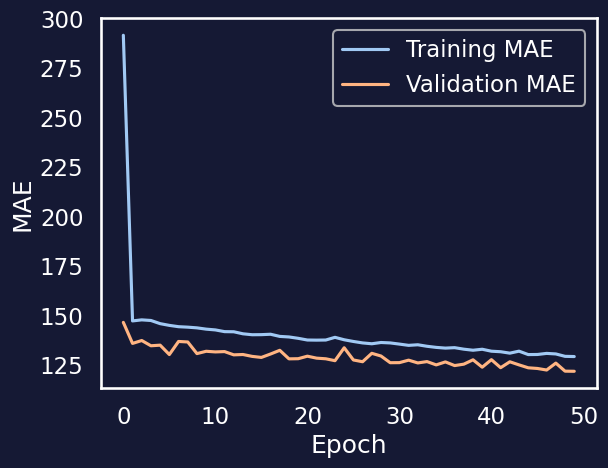

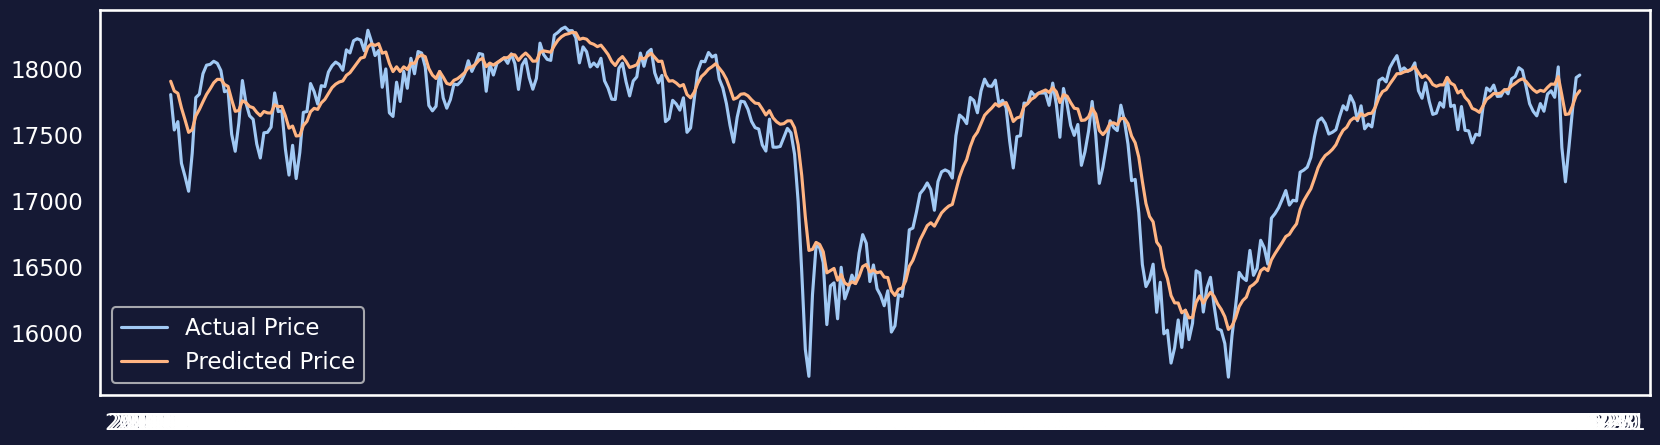

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 40713.5078 - mae: 156.5987
Test Mean Absolute Error: 162.00791931152344


In [90]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# Adjust learning rate and add decay schedule for fine-tuning
learning_rate = 0.00001  # Lower learning rate for fine-tuning

# Rebuild the combined model with GPT-2 embeddings and numerical features
combined_model.compile(optimizer=Adam(learning_rate=learning_rate),
                       loss='mean_squared_error',
                       metrics=['mae'])

# Add callbacks for early stopping, model checkpoint, and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-6)

# Fine-tune the model with more epochs and callbacks
history = combined_model.fit([X_train, padded_corpus_train, attention_masks_train],
                             y_train,
                             epochs=50,  # Increase the number of epochs
                             batch_size=32,  # Adjust batch size based on available memory
                             validation_split=0.2,
                             callbacks=[early_stopping, reduce_lr])

# Align the sizes of padded_corpus_test and attention_masks_test with X_test and y_test
padded_corpus_test_aligned = padded_corpus_test[:len(X_test)]
attention_masks_test_aligned = attention_masks_test[:len(X_test)]

# Make predictions on the aligned test set
predictions_gpt2 = combined_model.predict([X_test, padded_corpus_test_aligned, attention_masks_test_aligned])

# Plot training history to visualize improvement
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()

# Flatten y_test for plotting
y_test_flat = y_test

# Plot predictions vs actual values
plt.figure(figsize=(20, 5))
plt.plot(y_test.index, y_test_flat, label="Actual Price", linestyle="-")
plt.plot(y_test.index, predictions_gpt2.flatten(), label="Predicted Price", linestyle="-")
plt.legend()
plt.grid(False)
plt.show()

# Evaluate the model on the test set
test_loss, test_mae = combined_model.evaluate([X_test, padded_corpus_test_aligned, attention_masks_test_aligned], y_test)
print(f'Test Mean Absolute Error: {test_mae}')


In [91]:
# Evaluate the current model with GPT-2 embeddings
model_results_GPT_no_embedding = evaluate_preds(y_true=y_test, y_pred=predictions_gpt2.flatten())  # Assuming predictions_gpt2 from the previous cell
model_results_GPT_no_embedding

{'mae': 162.0079,
 'mse': 44244.88,
 'rmse': 210.34467,
 'mape': 0.9406032,
 'mase': 5.1138997}

                           mae           mse        rmse      mape      mase
naive_model         125.681572  27671.523438  166.347595  0.728094  0.998652
CNN_results         132.982376  31218.779297  176.688370  0.770376  1.056248
Keras_no_embedding   58.371193   6212.988770   78.822510  0.338309  5.150212
GPT_no_embedding    162.007904  44244.878906  210.344666  0.940603  5.113900


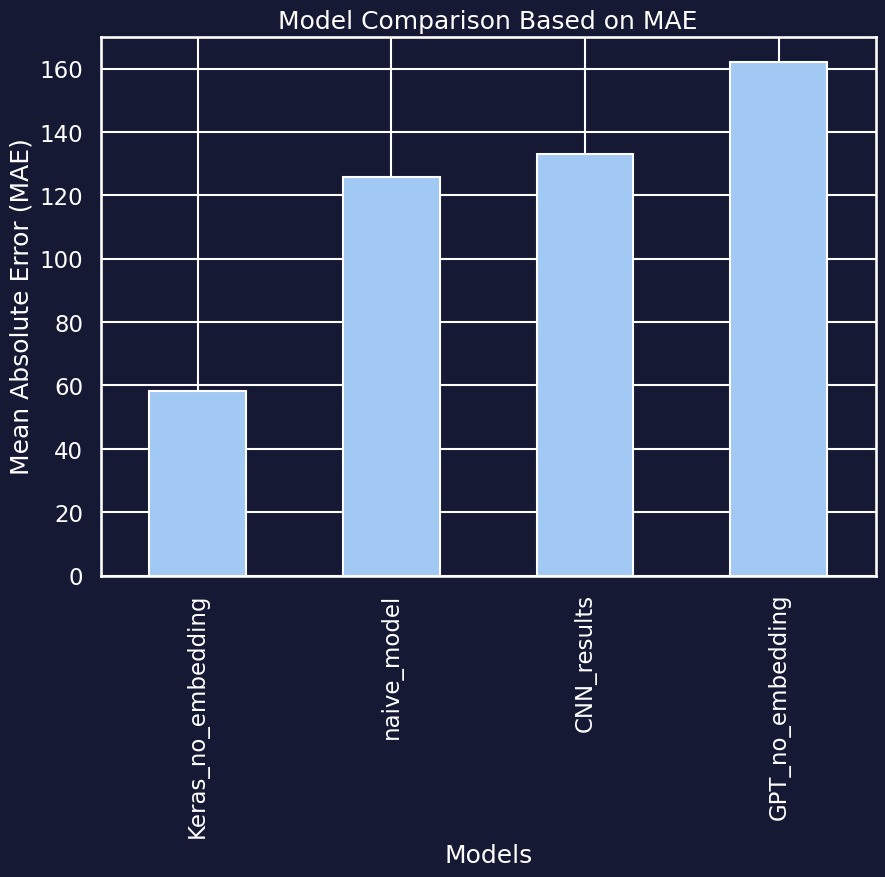

In [92]:
# Store all model results in a DataFrame
model_results = pd.DataFrame({
    "naive_model": naive_results,
    "CNN_results": CNN_model_results,
    "Keras_no_embedding": model_results_no_embedding,
    "GPT_no_embedding": model_results_GPT_no_embedding
}).T  # Transpose the DataFrame for easier plotting

# Print the results for clarity
print(model_results)

# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar", legend=False)
plt.title("Model Comparison Based on MAE")
plt.xlabel("Models")
plt.ylabel("Mean Absolute Error (MAE)")
plt.grid(True)
plt.show()

In [93]:
model_results

mae           mse        rmse      mape      mase
naive_model         125.681572  27671.523438  166.347595  0.728094  0.998652
CNN_results         132.982376  31218.779297  176.688370  0.770376  1.056248
Keras_no_embedding   58.371193   6212.988770   78.822510  0.338309  5.150212
GPT_no_embedding    162.007904  44244.878906  210.344666  0.940603  5.113900

Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 13s 164ms/step - loss: 30395.3691 - mae: 133.6260 - val_loss: 26158.1816 - val_mae: 122.0313 - learning_rate: 1.0000e-05
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 29459.3047 - mae: 125.8000 - val_loss: 26824.6289 - val_mae: 122.6865 - learning_rate: 1.0000e-05
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 30998.3613 - mae: 133.1727 - val_loss: 25926.1895 - val_mae: 121.5437 - learning_rate: 1.0000e-05
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 26817.1738 - mae: 124.2075 - val_loss: 25804.0820 - val_mae: 121.0757 - learning_rate: 1.0000e-05
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 30915.7480 - mae: 134.0699 - val_loss: 26950.3945 - val_mae: 127.0803 - learning_rate: 1.0000e-05
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 33468.2266 - mae: 134.1235 - val_loss: 25919.7246 - val_mae: 120.8543 - learning_rate: 1.0000e-05
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 275

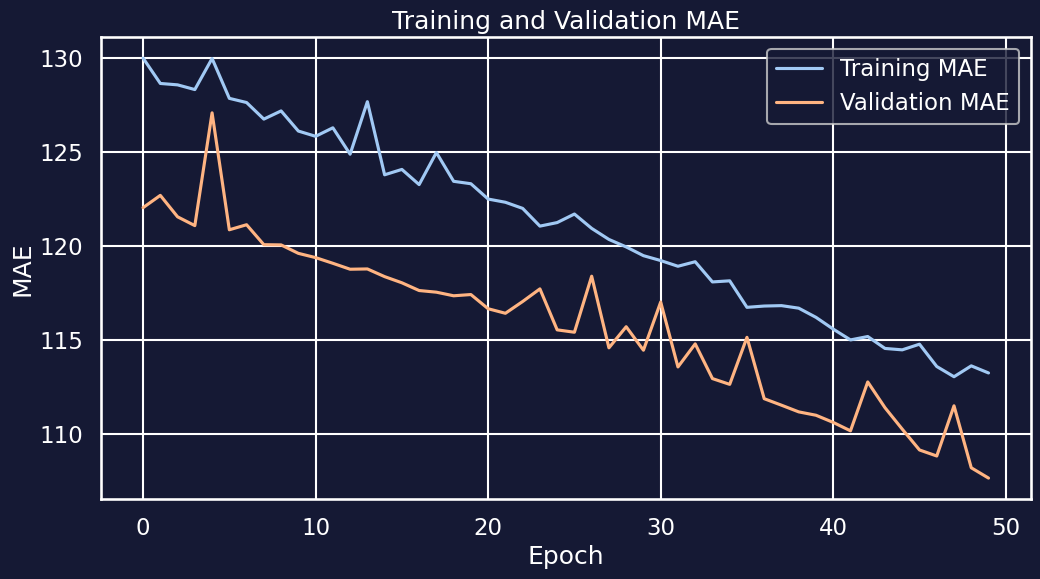

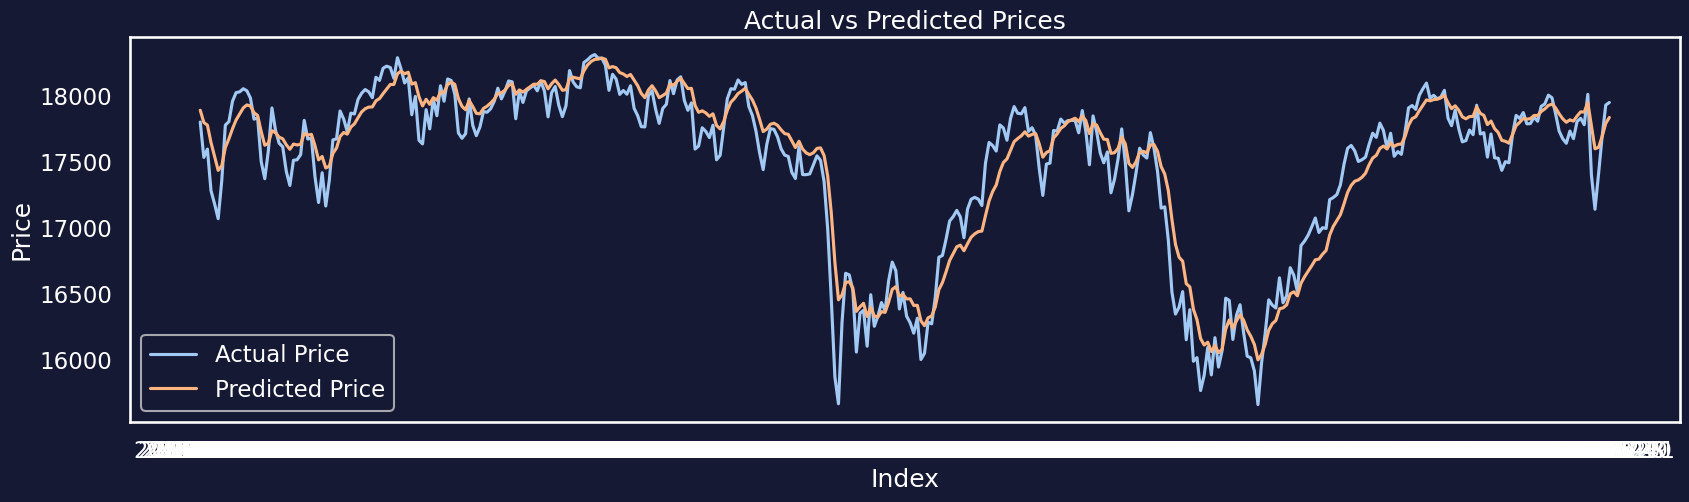

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 31291.6934 - mae: 137.9981
Test Mean Absolute Error: 143.17556762695312


In [94]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import pandas as pd

# Define learning rate and other hyperparameters
initial_learning_rate = 0.00001  # Lower learning rate for fine-tuning
batch_size = 32
epochs = 50

# Rebuild the combined model with GPT-2 embeddings and numerical features
combined_model.compile(optimizer=Adam(learning_rate=initial_learning_rate),
                       loss='mean_squared_error',
                       metrics=['mae'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-6)
# Fine-tune the model
history = combined_model.fit(
    [X_train, padded_corpus_train, attention_masks_train],
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.2,
    callbacks=[early_stopping, reduce_lr]
)

# Align the sizes of padded_corpus_test and attention_masks_test with X_test
padded_corpus_test_aligned = padded_corpus_test[:len(X_test)]
attention_masks_test_aligned = attention_masks_test[:len(X_test)]

# Make predictions on the aligned test set
predictions_gpt2 = combined_model.predict([X_test, padded_corpus_test_aligned, attention_masks_test_aligned])

# Plot training history to visualize improvement
plt.figure(figsize=(12, 6))
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('Training and Validation MAE')
plt.legend()
plt.grid(True)
plt.show()

# Flatten y_test for plotting
y_test_flat = y_test

# Plot predictions vs actual values
plt.figure(figsize=(20, 5))
plt.plot(y_test.index, y_test_flat, label="Actual Price", linestyle="-")
plt.plot(y_test.index, predictions_gpt2.flatten(), label="Predicted Price", linestyle="-")
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.grid(False)
plt.show()

# Evaluate the model on the test set
test_loss, test_mae = combined_model.evaluate([X_test, padded_corpus_test_aligned, attention_masks_test_aligned], y_test)
print(f'Test Mean Absolute Error: {test_mae}')




In [95]:
# Evaluate the current model with GPT-2 embeddings
model_results_GPT_no_embedding = evaluate_preds(y_true=y_test_flat, y_pred=predictions_gpt2.flatten())
model_results_GPT_no_embedding

{'mae': 143.17557,
 'mse': 34056.83,
 'rmse': 184.54492,
 'mape': 0.83010834,
 'mase': 5.131784}

                           mae           mse        rmse      mape      mase
naive_model         125.681572  27671.523438  166.347595  0.728094  0.998652
CNN_results         132.982376  31218.779297  176.688370  0.770376  1.056248
Keras_no_embedding   58.371193   6212.988770   78.822510  0.338309  5.150212
GPT_no_embedding    143.175568  34056.828125  184.544922  0.830108  5.131784


<Figure size 1000x700 with 0 Axes>

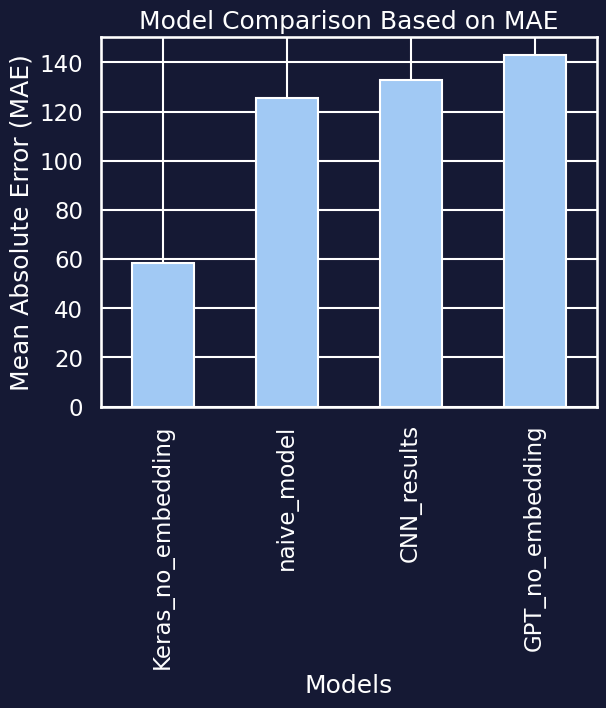

In [96]:
# Store all model results in a DataFrame
model_results = pd.DataFrame({
    "naive_model": naive_results,
    "CNN_results": CNN_model_results,
    "Keras_no_embedding": model_results_no_embedding,
    "GPT_no_embedding": model_results_GPT_no_embedding
}).T  # Transpose the DataFrame for easier plotting

# Print the results for clarity
print(model_results)

# Sort model results by MAE and plot them
plt.figure(figsize=(10, 7))
model_results[["mae"]].sort_values(by="mae").plot(kind="bar", legend=False)
plt.title("Model Comparison Based on MAE")
plt.xlabel("Models")
plt.ylabel("Mean Absolute Error (MAE)")
plt.grid(True)
plt.show()

In [97]:
model_results

mae           mse        rmse      mape      mase
naive_model         125.681572  27671.523438  166.347595  0.728094  0.998652
CNN_results         132.982376  31218.779297  176.688370  0.770376  1.056248
Keras_no_embedding   58.371193   6212.988770   78.822510  0.338309  5.150212
GPT_no_embedding    143.175568  34056.828125  184.544922  0.830108  5.131784

# GPT with text embedding

In [98]:
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(1575, 1575, 394, 394)

In [99]:
# prompt: write code fromhere with text embedding usng GPT model

# Assuming corpus, corpus_test, x_train, x_test, y_train, and y_test are already defined

# Tokenize and encode the text data
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
model = TFGPT2Model.from_pretrained("gpt2")

def encode_text(corpus):
  encoded_corpus = [tokenizer.encode(text, add_special_tokens=True) for text in corpus]
  max_length = 50  # Adjust based on your requirements
  padded_corpus = pad_sequences(encoded_corpus, maxlen=max_length, padding='post', truncating='post')
  return padded_corpus

padded_corpus_train = encode_text(train_news["spellcheck"])
padded_corpus_test = encode_text(test_news["spellcheck"])

# Extract embeddings from GPT-2
def extract_embeddings(padded_corpus):
  embeddings = []
  for sequence in padded_corpus:
    input_ids = tf.constant(sequence)[None, :]  # Batch size 1
    outputs = model(input_ids)
    last_hidden_states = outputs.last_hidden_state
    embedding = tf.reduce_mean(last_hidden_states, axis=1).numpy()  # Average over the sequence length
    embeddings.append(embedding.flatten())
  return np.array(embeddings)

train_embeddings = extract_embeddings(padded_corpus_train)
test_embeddings = extract_embeddings(padded_corpus_test)




All PyTorch model weights were used when initializing TFGPT2Model.

All the weights of TFGPT2Model were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2Model for predictions without further training.


In [100]:
print("x_train shape:", x_train.shape)
print("train_embeddings shape:", train_embeddings.shape)
print("x_test shape:", x_test.shape)
print("test_embeddings shape:", test_embeddings.shape)


x_train shape: (1575, 7)
train_embeddings shape: (1575, 768)
x_test shape: (394, 7)
test_embeddings shape: (414, 768)


In [101]:
# Determine the minimum number of samples in test data
min_test_length = min(len(x_test), len(test_embeddings))

# Truncate test_embeddings to match x_test
x_test = x_test[:min_test_length]
test_embeddings = test_embeddings[:min_test_length]

# Combine numerical features and text embeddings
x_train_combined = np.concatenate([x_train, train_embeddings], axis=1)
x_test_combined = np.concatenate([x_test, test_embeddings], axis=1)

# Define and train a model (adjust architecture as needed)
model = Sequential()
model.add(Dense(512, activation='relu', input_dim=x_train_combined.shape[1]))
model.add(Dense(1, activation='linear'))  # Linear activation for regression

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
history = model.fit(x_train_combined, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_mae = model.evaluate(x_test_combined, y_test)
print(f'Test Mean Absolute Error: {test_mae}')


Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 33571516.0000 - mae: 4523.1040 - val_loss: 1969097.5000 - val_mae: 1389.9923
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 327103.6250 - mae: 465.9329 - val_loss: 41113.8828 - val_mae: 169.1752
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 53426.8047 - mae: 162.3932 - val_loss: 34564.0625 - val_mae: 143.4150
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 60004.8320 - mae: 170.5066 - val_loss: 52387.3633 - val_mae: 199.3372
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 47217.2930 - mae: 162.3085 - val_loss: 39681.8047 - val_mae: 162.8422
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 50923.2109 - mae: 167.9464 - val_loss: 39888.8047 - val_mae: 162.9335
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 50382.9844 - mae: 161.8543 - val_loss: 39078.8242 - val_mae: 159.9114
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 55225.5742 - mae: 167.4571 - val_loss

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 29327.3613 - mae: 132.2604 
Test Mean Absolute Error: 143.3434295654297


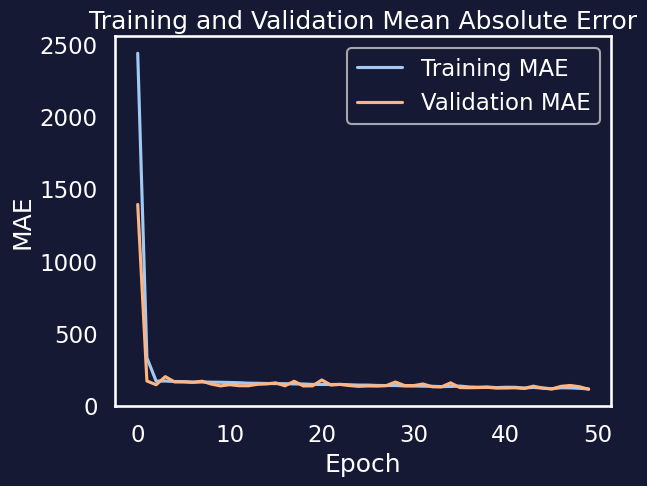

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [102]:
import matplotlib.pyplot as plt

# Evaluate the model on the test set with combined features
test_loss, test_mae = model.evaluate(x_test_combined, y_test)
print(f'Test Mean Absolute Error: {test_mae}')

# Plot training history (optional)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.title('Training and Validation Mean Absolute Error')
plt.show()

# Make predictions on the test set with combined features
predictions = model.predict(x_test_combined).flatten()


In [103]:
# Assuming evaluate_preds is a predefined function to evaluate predictions
model_results_with_embedding_GPT = evaluate_preds(y_true=y_test, y_pred=predictions)
model_results_with_embedding_GPT

{'mae': 143.34343,
 'mse': 34592.78,
 'rmse': 185.99135,
 'mape': 0.8283958,
 'mase': 5.133575}

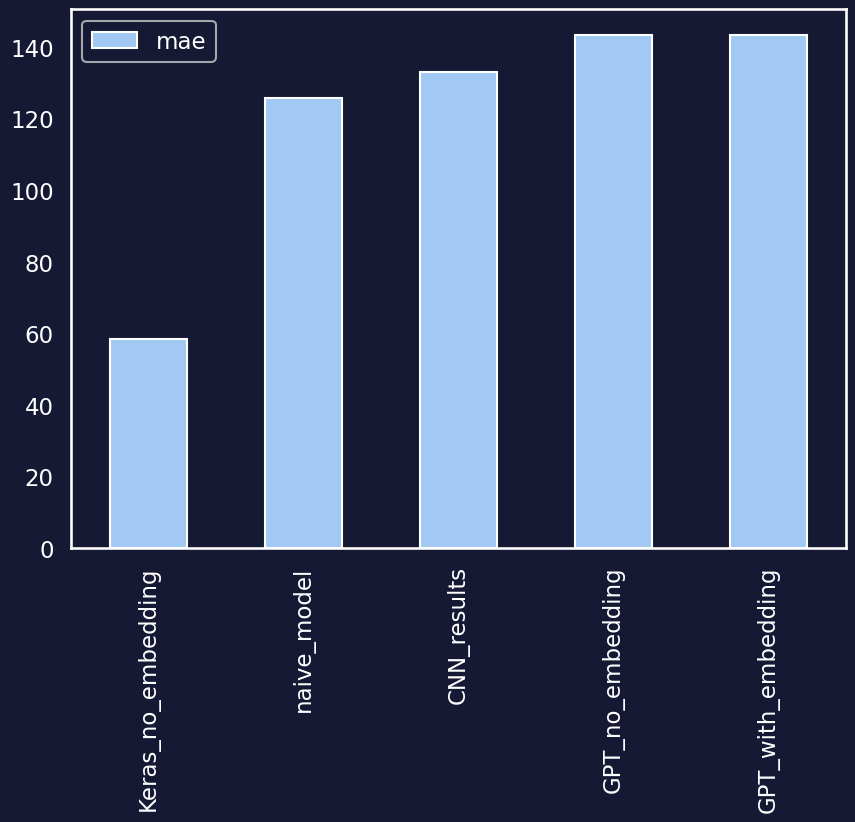

In [104]:
# Store all model results in a DataFrame
model_results = pd.DataFrame({
    "naive_model": naive_results,
    "CNN_results": CNN_model_results,
    "Keras_no_embedding": model_results_no_embedding,
    "GPT_no_embedding": model_results_GPT_no_embedding,
    "GPT_with_embedding": model_results_with_embedding_GPT
}).T  # Transpose the DataFrame for easier plotting

# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar")
plt.show()

In [105]:
model_results

mae           mse        rmse      mape      mase
naive_model         125.681572  27671.523438  166.347595  0.728094  0.998652
CNN_results         132.982376  31218.779297  176.688370  0.770376  1.056248
Keras_no_embedding   58.371193   6212.988770   78.822510  0.338309  5.150212
GPT_no_embedding    143.175568  34056.828125  184.544922  0.830108  5.131784
GPT_with_embedding  143.343430  34592.781250  185.991348  0.828396  5.133575

# BERT

In [106]:
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(1575, 1575, 394, 394)

In [107]:
X

MA7          MA20       MACD        20SD    upper_band  \
Date                                                                          
2008-09-08  11461.267160  11503.387402 -23.789161  151.597006  11806.581414   
2008-09-09  11392.060128  11475.806445 -29.334960  148.316713  11772.439871   
2008-09-10  11352.768694  11457.128955 -25.654980  149.737930  11756.604816   
2008-09-11  11340.881557  11452.166455  -7.070017  148.733794  11749.634043   
2008-09-12  11325.040179  11442.469483  10.050858  143.733062  11729.935607   
...                  ...           ...        ...         ...           ...   
2016-06-27  17663.235770  17767.995019 -44.865946  205.436138  18178.867296   
2016-06-28  17625.315848  17749.121094 -46.806466  220.375674  18189.872442   
2016-06-29  17609.574498  17744.371582 -26.720515  220.479360  18185.330302   
2016-06-30  17623.897321  17748.943066   5.517607  223.462769  18195.868604   
2016-07-01  17647.974330  17756.058496  31.932074  227.637403  18211.333301   

              lower_band           EMA  
Date                                    
2008-09-08  11200.193391  11423.314793  
2008-09-09  11179.173020  11294.925244  
2008-09-10  11157.653094  11277.588363  
2008-09-11  11154.698867  11381.669428  
2008-09-12  11155.003358  11408.549965  
...                  ...           ...  
2016-06-27  17357.122743  17286.702282  
2016-06-28  17308.369746  17368.714563  
2016-06-29  17303.412862  17586.024646  
2016-06-30  17302.017529  17815.335038  
2016-07-01  17300.783691  17904.691107  

[1969 rows x 7 columns]

In [108]:
y

Close
Date                    
2008-09-08  11510.740234
2008-09-09  11230.730469
2008-09-10  11268.919922
2008-09-11  11433.709961
2008-09-12  11421.990234
...                  ...
2016-06-27  17140.240234
2016-06-28  17409.720703
2016-06-29  17694.679688
2016-06-30  17929.990234
2016-07-01  17949.369141

[1969 rows x 1 columns]

In [109]:
x_train = X_train.to_numpy()
y_train = y_train.to_numpy()
x_test  = X_test.to_numpy()
y_test  = y_test.to_numpy()

In [110]:
## feature matrix
X_feature_new = [np.asarray(x_train, dtype='int32')]

In [111]:
## feature matrix
X_feature_new_1 = [np.asarray(x_test, dtype='int32')]

In [112]:

## bert tokenizer
tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [113]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Encode text into token IDs
encoded_corpus = [tokenizer.encode(text, add_special_tokens=True) for text in corpus]

# Pad sequences to a specified length
max_length = 50  # Adjust this based on your requirements
padded_corpus_train = pad_sequences(encoded_corpus, maxlen=max_length, padding='post', truncating='post')

# Print the first padded sequence
print("Padded Sequence:", padded_corpus_train[0])

Padded Sequence: [  101  4108  2845 13297  2406 20911  2162  3338 14163  7377 11335  2546
 17727  5243  2818  3607  2651  5930 10123  4897  2148  9808 13462  2401
  8333  2954  7858  2845  4951  8353  2148  9808 13462  2401  7283  3143
  6033  4108  4893  2543 12632  2775  9040  7953  2436  5305  2095  2214
  9040  2845]


In [114]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Encode text into token IDs
encoded_corpus = [tokenizer.encode(text, add_special_tokens=True) for text in corpus_test]

# Pad sequences to a specified length
max_length = 50  # Adjust this based on your requirements
padded_corpus_test = pad_sequences(encoded_corpus, maxlen=max_length, padding='post', truncating='post')

# Print the first padded sequence
print("Padded Sequence:", padded_corpus_test[0])

Padded Sequence: [  101  4831  2605  4654  9006 23041 21877  3527 24862  5619  5011  6449
  4424  3902  9454  2502  8246  2924  3627  4895  3726  4014  2047  3795
  3627  4652  2924  2502  8246 15358 23726 17678  2891 10556 27694 18384
  2644 22072  3477  3976  2101 21722  4424  3902  2879  4237  3375  2379
  3323  6709]


In [115]:
# Check the number of samples in each dataset
print("Number of samples in x_test:", x_test.shape[0])
print("Number of samples in padded_corpus_test:", padded_corpus_test.shape[0])

Number of samples in x_test: 394
Number of samples in padded_corpus_test: 414


In [116]:
min_samples = min(x_test.shape[0], padded_corpus_test.shape[0])
# Trim or pad the datasets
x_test = x_test[:min_samples]
padded_corpus_test = padded_corpus_test[:min_samples]
# Now, attempt the concatenation again
x_test_combined = np.concatenate([x_test, padded_corpus_test], axis=1)
# Check the shape after concatenation
print("Shape of x_test_combined:", x_test_combined.shape)

Shape of x_test_combined: (394, 57)


In [117]:

import numpy as np

# Assuming you have numerical features (X_train, X_test) and encoded text sequences (padded_corpus_train, padded_corpus_test)

# Merge numerical features and encoded text sequences for training set
x_train_combined = np.concatenate([x_train, padded_corpus_train], axis=1)

# Merge numerical features and encoded text sequences for testing set
x_test_combined = np.concatenate([x_test, padded_corpus_test], axis=1)

# Ensure the shapes are correct
print("Shape of x_train_combined:", x_train_combined.shape)
print("Shape of x_test_combined:", x_test_combined.shape)

Shape of x_train_combined: (1575, 57)
Shape of x_test_combined: (394, 57)


In [118]:
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(1575, 1575, 394, 394)

# BERT with no text embedding

In [119]:
# prompt: build BERT model with zero embedding

!pip install transformers

import transformers
from transformers import BertTokenizer, TFBertModel
from tensorflow.keras.layers import Input, Dense, Flatten, Concatenate
from tensorflow.keras.models import Model

# Load pre-trained BERT model and tokenizer
model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)
bert_model = TFBertModel.from_pretrained(model_name)

# Assuming you have numerical features (x_train, x_test) and encoded text sequences (padded_corpus_train, padded_corpus_test)

# Freeze the pre-trained BERT layers
bert_model.trainable = False

# BERT model input
bert_input = Input(shape=(max_length,), dtype=tf.int32, name="bert_input")

# Define a custom layer to use the BERT model
class BertFeatureExtractor(tf.keras.layers.Layer):
    def __init__(self, bert_model):
        super(BertFeatureExtractor, self).__init__()
        self.bert_model = bert_model

    def call(self, inputs):
        bert_outputs = self.bert_model(inputs)
        return bert_outputs.last_hidden_state

# Use the custom layer
bert_features = BertFeatureExtractor(bert_model)(bert_input)

# Flatten the BERT output
bert_output_flat = Flatten()(bert_features)

# Numerical input layer

your_numerical_feature_dim = 7
numerical_input = Input(shape=(your_numerical_feature_dim,), name="numerical_input")

# Concatenate BERT features with numerical features
combined_input = Concatenate()([bert_output_flat, numerical_input])

# Dense layers
dense_layer1 = Dense(256, activation='relu')(combined_input)
dense_layer2 = Dense(128, activation='relu')(dense_layer1)
dense_layer3 = Dense(64, activation='relu')(dense_layer2)
output_layer = Dense(1, activation='linear')(dense_layer3)

# Define the combined model
combined_model = Model(inputs=[bert_input, numerical_input], outputs=output_layer)

# Compile the model with mean squared error loss for regression
combined_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model with combined inputs
combined_model.fit([padded_corpus_train, x_train], y_train, epochs=20, batch_size=16, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_mae = combined_model.evaluate([padded_corpus_test, x_test], y_test)
print(f'Test Mean Absolute Error: {test_mae}')

# Predict on the test set
predictions_BERT = combined_model.predict([padded_corpus_test, x_test])

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Epoch 1/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 42s 300ms/step - loss: 47956080.0000 - mae: 5246.7729 - val_loss: 402200.2500 - val_mae: 594.8125
Epoch 2/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 15s 55ms/step - loss: 115408.9141 - mae: 258.6540 - val_loss: 227963.5625 - val_mae: 438.0474
Epoch 3/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - loss: 89409.7031 - mae: 216.1022 - val_loss: 237483.6094 - val_mae: 448.9676
Epoch 4/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 75449.6406 - mae: 203.2508 - val_loss: 190701.5156 - val_mae: 397.9653
Epoch 5/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 57276.6055 - mae: 184.6450 - val_loss: 213153.7812 - val_mae: 422.5744
Epoch 6/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - loss: 61455.4883 - mae: 187.9908 - val_loss: 93169.2969 - val_mae: 265.8160
Epoch 7/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - loss: 48332.6719 - mae: 162.6999 - val_loss: 59333.9570 - val_mae: 200.9460
Epoch 8/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - loss: 44480.0117 - mae: 162.537

In [120]:
# Assuming evaluate_preds is a predefined function to evaluate predictions
bert_model_results = evaluate_preds(y_true=y_test, y_pred=predictions_BERT)
bert_model_results


{'mae': 171.95348,
 'mse': 50264.457,
 'rmse': 224.19736,
 'mape': 0.9930317,
 'mase': 1.363729}

In [121]:
!pip install transformers

import transformers
import tensorflow as tf
from transformers import BertTokenizer, TFBertModel
from tensorflow.keras.layers import Input, Dense, Flatten, Concatenate
from tensorflow.keras.models import Model

# Load pre-trained BERT model and tokenizer
model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)
bert_model = TFBertModel.from_pretrained(model_name)

# Freeze the pre-trained BERT layers
bert_model.trainable = False

# BERT model input
max_length = 50  # Adjust max_length according to your data
bert_input = Input(shape=(max_length,), dtype=tf.int32, name="bert_input")

# Define a custom layer to use the BERT model
class BertFeatureExtractor(tf.keras.layers.Layer):
    def __init__(self, bert_model):
        super(BertFeatureExtractor, self).__init__()
        self.bert_model = bert_model

    def call(self, inputs):
        bert_outputs = self.bert_model(inputs)
        return bert_outputs.last_hidden_state

# Define a custom layer to zero out BERT embeddings
class ZeroOutEmbeddings(tf.keras.layers.Layer):
    def __init__(self):
        super(ZeroOutEmbeddings, self).__init__()

    def call(self, inputs):
        return tf.zeros_like(inputs)

# Use the custom layer for BERT feature extraction and zeroing out embeddings
bert_features = BertFeatureExtractor(bert_model)(bert_input)
zeroed_bert_features = ZeroOutEmbeddings()(bert_features)

# Flatten the zeroed BERT output
bert_output_flat = Flatten()(zeroed_bert_features)

# Numerical input layer
your_numerical_feature_dim = x_train.shape[1]  # Adjust according to your data
numerical_input = Input(shape=(your_numerical_feature_dim,), name="numerical_input")

# Concatenate zeroed BERT features with numerical features
combined_input = Concatenate()([bert_output_flat, numerical_input])

# Dense layers
dense_layer1 = Dense(256, activation='relu')(combined_input)
dense_layer2 = Dense(128, activation='relu')(dense_layer1)
dense_layer3 = Dense(64, activation='relu')(dense_layer2)
output_layer = Dense(1, activation='linear')(dense_layer3)

# Define the combined model
combined_model = Model(inputs=[bert_input, numerical_input], outputs=output_layer)

# Compile the model with mean squared error loss for regression
combined_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model with combined inputs
combined_model.fit([padded_corpus_train, x_train], y_train, epochs=20, batch_size=16, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_mae = combined_model.evaluate([padded_corpus_test, x_test], y_test)
print(f'Test Mean Absolute Error: {test_mae}')

# Predict on the test set
predictions_BERT = combined_model.predict([padded_corpus_test, x_test])


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Epoch 1/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 33s 172ms/step - loss: 41461500.0000 - mae: 4921.2339 - val_loss: 85150.1953 - val_mae: 262.0459
Epoch 2/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 53056.4102 - mae: 177.3216 - val_loss: 37380.6172 - val_mae: 150.7750
Epoch 3/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 46740.3281 - mae: 158.5269 - val_loss: 36565.1953 - val_mae: 146.8092
Epoch 4/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 50435.3359 - mae: 163.3488 - val_loss: 35697.8281 - val_mae: 141.0098
Epoch 5/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 54890.1992 - mae: 174.4608 - val_loss: 51464.4102 - val_mae: 191.2420
Epoch 6/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 50324.3125 - mae: 166.5474 - val_loss: 39813.7695 - val_mae: 157.8443
Epoch 7/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 45383.1211 - mae: 158.6290 - val_loss: 38900.0078 - val_mae: 155.5166
Epoch 8/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 48471.2422 - mae: 164.9651 - val_loss: 

In [122]:

# Assuming evaluate_preds is a predefined function to evaluate predictions
bert_model_results = evaluate_preds(y_true=y_test, y_pred=predictions_BERT)
bert_model_results

{'mae': 206.21002,
 'mse': 63881.582,
 'rmse': 252.74806,
 'mape': 1.1937989,
 'mase': 1.6354109}

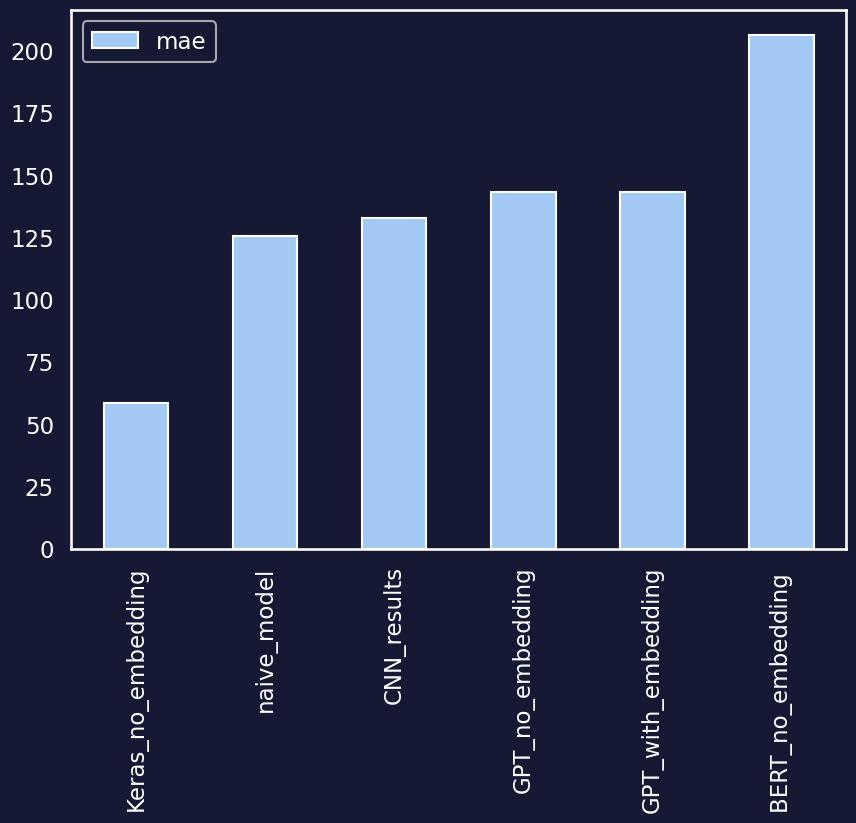

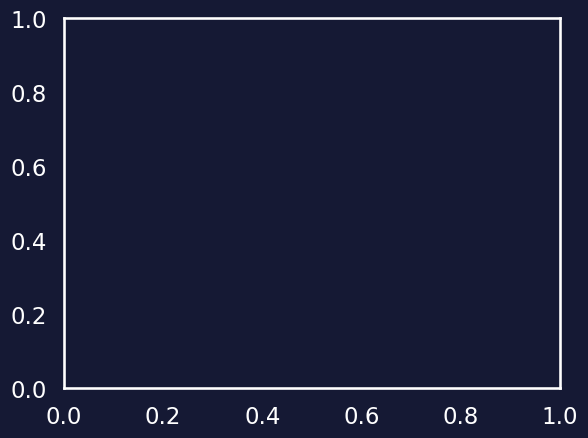

In [123]:
# Store all model results in a DataFrame
model_results = pd.DataFrame({
    "naive_model": naive_results,
    "CNN_results": CNN_model_results,
    "Keras_no_embedding": model_results_no_embedding,
    "GPT_no_embedding": model_results_GPT_no_embedding,
    "GPT_with_embedding": model_results_with_embedding_GPT,
    "BERT_no_embedding ": bert_model_results
}).T  # Transpose the DataFrame for easier plotting


# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar")
plt.show()
plt.grid(False)

# BERT with text embedding

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Model: "functional_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ text_input_ids            │ (None, 50)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ text_attention_masks      │ (None, 50)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bert_feature_extractor_2  │ (None, 50, 768)        │              0 │ text_input_ids[0][0],  │
│ (BERTFeatureExtractor)    │                        │                │ text_attention_masks[… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ numerical_input           │ (None, 7)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_3 (Flatten)       │ (None, 38400)          │              0 │ bert_feature_extracto… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_3             │ (None, 38407)          │              0 │ numerical_input[0][0], │
│ (Concatenate)             │                        │                │ flatten_3[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_23 (Dense)          │ (None, 256)            │      9,832,448 │ concatenate_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_24 (Dense)          │ (None, 128)            │         32,896 │ dense_23[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_25 (Dense)          │ (None, 64)             │          8,256 │ dense_24[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_26 (Dense)          │ (None, 1)              │             65 │ dense_25[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 9,873,665 (37.67 MB)

 Trainable params: 9,873,665 (37.67 MB)

 Non-trainable params: 0 (0.00 B)

x_test_np shape: (394, 7)
padded_corpus_test_np shape: (414, 50)
attention_masks_test_np shape: (414, 50)
y_test shape: (394, 1)
Epoch 1/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 59s 853ms/step - loss: 79050112.0000 - mae: 7931.1270 - val_loss: 7918566.0000 - val_mae: 2802.0349
Epoch 2/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - loss: 1018014.9375 - mae: 817.1832 - val_loss: 147994.5469 - val_mae: 342.9447
Epoch 3/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - loss: 126557.4453 - mae: 265.9619 - val_loss: 316376.0000 - val_mae: 523.4141
Epoch 4/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 120ms/step - loss: 100057.1641 - mae: 239.3130 - val_loss: 315234.0625 - val_mae: 523.0465
Epoch 5/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - loss: 90824.4375 - mae: 230.3169 - val_loss: 381172.8125 - val_mae: 580.3314
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 477ms/step - loss: 464408.7188 - mae: 643.1270
Test Mean Absolute Error: 641.8107299804688


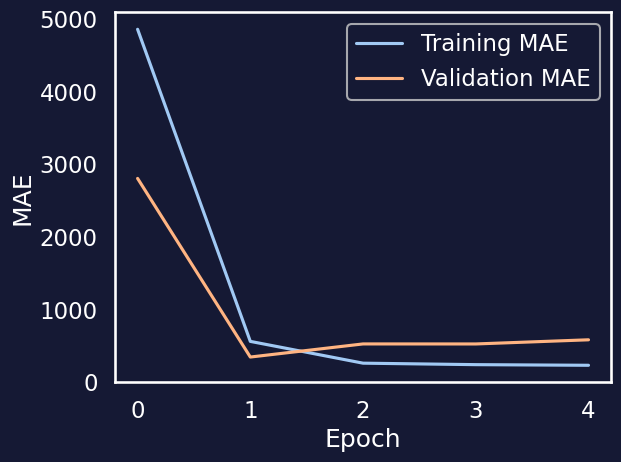

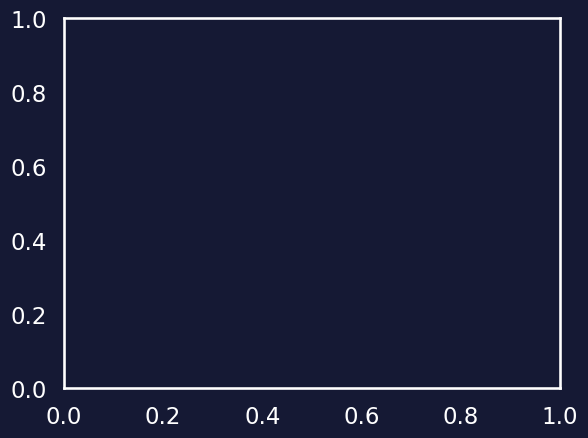

In [124]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Concatenate, Input
from transformers import BertTokenizer, TFBertModel
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences

X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

# Assuming your data is already in numpy format
x_train = X_train.to_numpy()
y_train = y_train.to_numpy()
x_test = X_test.to_numpy()
y_test = y_test.to_numpy()

# Load pre-trained BERT model and tokenizer
model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name, do_lower_case=True)
bert_model = TFBertModel.from_pretrained(model_name)

# Tokenize and pad the training and testing text data
encoded_corpus_train = [tokenizer.encode(text, add_special_tokens=True) for text in corpus]
encoded_corpus_test = [tokenizer.encode(text, add_special_tokens=True) for text in corpus_test]

max_length = 50  # Maximum length for padding/truncating sequences
padded_corpus_train = pad_sequences(encoded_corpus_train, maxlen=max_length, padding='post', truncating='post')
padded_corpus_test = pad_sequences(encoded_corpus_test, maxlen=max_length, padding='post', truncating='post')

# Create attention masks for the text data
attention_masks_train = np.array([[float(i > 0) for i in seq] for seq in padded_corpus_train])
attention_masks_test = np.array([[float(i > 0) for i in seq] for seq in padded_corpus_test])

# Define input shapes
numerical_input_shape = x_train.shape[1]
text_input_shape = max_length

# Define the custom layer for BERT
class BERTFeatureExtractor(tf.keras.layers.Layer):
    def __init__(self, bert_model):
        super(BERTFeatureExtractor, self).__init__()
        self.bert_model = bert_model

    def call(self, inputs):
        input_ids, attention_masks = inputs
        outputs = self.bert_model(input_ids, attention_mask=attention_masks)
        return outputs.last_hidden_state

# Define the numerical input layer
numerical_input = Input(shape=(numerical_input_shape,), name="numerical_input")

# Define the text input layers
text_input_ids = Input(shape=(text_input_shape,), dtype=tf.int32, name="text_input_ids")
text_attention_masks = Input(shape=(text_input_shape,), dtype=tf.float32, name="text_attention_masks")

# Use the custom layer to get BERT features
bert_features = BERTFeatureExtractor(bert_model)([text_input_ids, text_attention_masks])

# Flatten the BERT output
text_embedding_flat = Flatten()(bert_features)

# Concatenate numerical and text features
combined_input = Concatenate()([numerical_input, text_embedding_flat])

# Dense layers for regression
dense_layer1 = Dense(256, activation='relu')(combined_input)
dense_layer2 = Dense(128, activation='relu')(dense_layer1)
dense_layer3 = Dense(64, activation='relu')(dense_layer2)
output_layer = Dense(1, activation='linear')(dense_layer3)

# Create the combined model
combined_model = Model(inputs=[numerical_input, text_input_ids, text_attention_masks], outputs=output_layer)

# Compile the model
combined_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Display the model summary
combined_model.summary()

# Convert inputs to NumPy arrays
x_train_np = np.array(x_train)
x_test_np = np.array(x_test)
padded_corpus_train_np = np.array(padded_corpus_train)
padded_corpus_test_np = np.array(padded_corpus_test)
attention_masks_train_np = np.array(attention_masks_train)
attention_masks_test_np = np.array(attention_masks_test)

# Print shapes to debug the issue
print(f'x_test_np shape: {x_test_np.shape}')
print(f'padded_corpus_test_np shape: {padded_corpus_test_np.shape}')
print(f'attention_masks_test_np shape: {attention_masks_test_np.shape}')
print(f'y_test shape: {y_test.shape}')

# Trimming padded_corpus_test_np and attention_masks_test_np to match x_test_np and y_test
padded_corpus_test_np = padded_corpus_test_np[:x_test_np.shape[0]]
attention_masks_test_np = attention_masks_test_np[:x_test_np.shape[0]]

# Ensure the number of samples matches across all inputs
assert x_train_np.shape[0] == padded_corpus_train_np.shape[0] == attention_masks_train_np.shape[0] == y_train.shape[0], "Train input shapes do not match"
assert x_test_np.shape[0] == padded_corpus_test_np.shape[0] == attention_masks_test_np.shape[0] == y_test.shape[0], "Test input shapes do not match"

# Train the model
history = combined_model.fit([x_train_np, padded_corpus_train_np, attention_masks_train_np], y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_mae = combined_model.evaluate([x_test_np, padded_corpus_test_np, attention_masks_test_np], y_test)
print(f'Test Mean Absolute Error: {test_mae}')

# Plot training history (optional)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()
plt.grid(False)


In [125]:
# Predict on the test set
predictions_BERT = combined_model.predict([np.array(x_test_np), np.array(padded_corpus_test_np), np.array(attention_masks_test_np)])

# Evaluate predictions
BERT_dense_model_results = evaluate_preds(y_true=y_test, y_pred=predictions_BERT)
BERT_dense_model_results

13/13 ━━━━━━━━━━━━━━━━━━━━ 18s 921ms/step


{'mae': 641.8108,
 'mse': 463833.62,
 'rmse': 681.0533,
 'mape': 3.653544,
 'mase': 5.0900745}

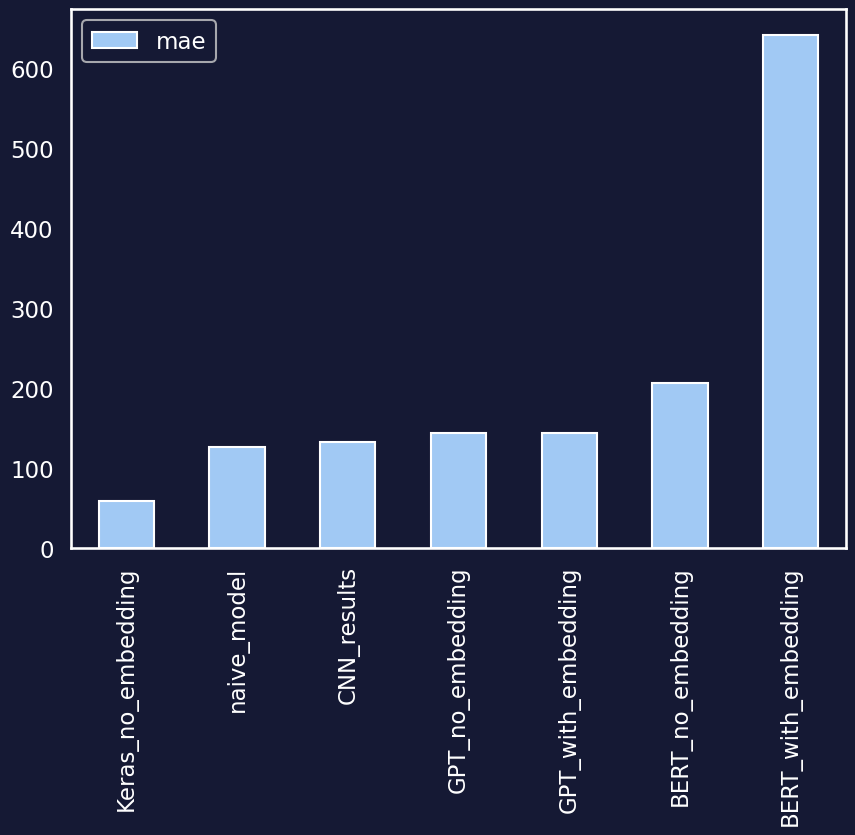

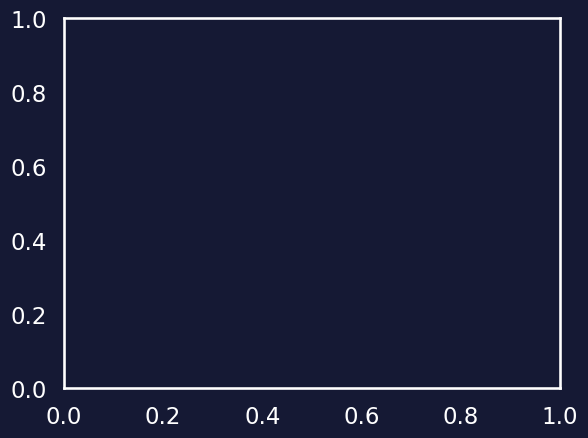

In [126]:
# Store all model results in a DataFrame
model_results = pd.DataFrame({
    "naive_model": naive_results,
    "CNN_results": CNN_model_results,
    "Keras_no_embedding": model_results_no_embedding,
    "GPT_no_embedding": model_results_GPT_no_embedding,
    "GPT_with_embedding": model_results_with_embedding_GPT,
    "BERT_no_embedding": bert_model_results,
    "BERT_with_embedding": BERT_dense_model_results
}).T  # Transpose the DataFrame for easier plotting




# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar")
plt.show()
plt.grid(False)

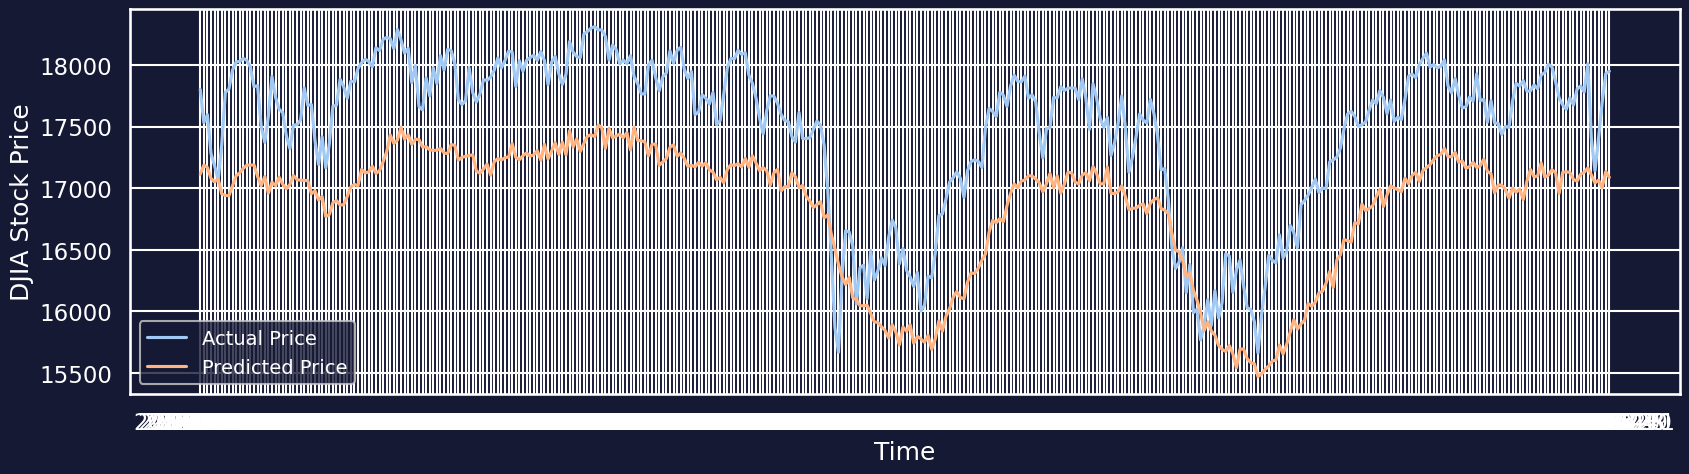

mae            mse        rmse      mape      mase
naive_model          125.681572   27671.523438  166.347595  0.728094  0.998652
CNN_results          132.982376   31218.779297  176.688370  0.770376  1.056248
Keras_no_embedding    58.371193    6212.988770   78.822510  0.338309  5.150212
GPT_no_embedding     143.175568   34056.828125  184.544922  0.830108  5.131784
GPT_with_embedding   143.343430   34592.781250  185.991348  0.828396  5.133575
BERT_no_embedding    206.210022   63881.582031  252.748062  1.193799  1.635411
BERT_with_embedding  641.810791  463833.625000  681.053284  3.653544  5.090075

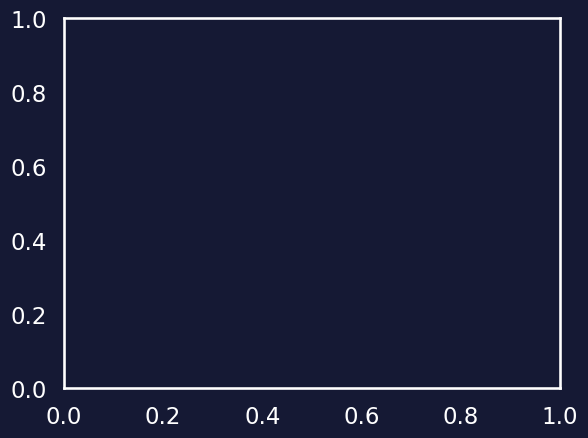

In [127]:
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

# Plot future price predictions of sts
plt.figure(figsize=(20, 5))
plot_time_series(y_test.index, y_test, format="-", label="Actual Price")
plot_time_series(y_test.index, predictions_BERT, format="-", label="Predicted Price")
plt.show()
plt.grid(False)


# Compare model results
model_results


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Adjusting the number of samples to match between x_test and test BERT embeddings.


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                     │ (None, 512)                 │      19,664,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,837,441 (75.67 MB)

 Trainable params: 19,837,441 (75.67 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - loss: 79291736.0000 - mae: 7787.4893 - val_loss: 1999160.5000 - val_mae: 1397.2101
Epoch 2/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 983615.8750 - mae: 837.0856 - val_loss: 88713.4453 - val_mae: 257.8970
Epoch 3/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 129825.3203 - mae: 274.6596 - val_loss: 193142.7500 - val_mae: 400.4291
Epoch 4/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 91389.3047 - mae: 227.8826 - val_loss: 202723.3594 - val_mae: 412.4693
Epoch 5/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 84611.6953 - mae: 216.7366 - val_loss: 175507.6250 - val_mae: 381.5732
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 216795.3594 - mae: 421.3553
Test Mean Absolute Error: 426.53961181640625


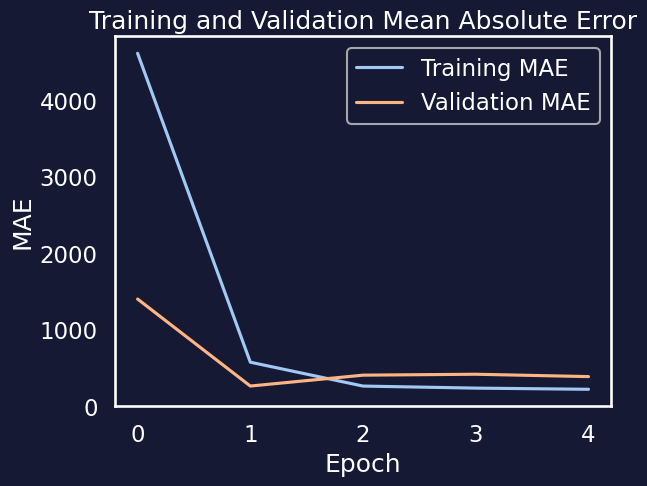

In [128]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from transformers import BertTokenizer, TFBertModel
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Assuming your data is already in numpy format
x_train = X_train.to_numpy()
y_train = y_train.to_numpy()
x_test = X_test.to_numpy()
y_test = y_test.to_numpy()

# Load pre-trained BERT model and tokenizer
model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name, do_lower_case=True)
bert_model = TFBertModel.from_pretrained(model_name)

# Tokenize and pad the training and testing text data
encoded_corpus_train = [tokenizer.encode(text, add_special_tokens=True) for text in corpus]
encoded_corpus_test = [tokenizer.encode(text, add_special_tokens=True) for text in corpus_test]

max_length = 50  # Maximum length for padding/truncating sequences
padded_corpus_train = pad_sequences(encoded_corpus_train, maxlen=max_length, padding='post', truncating='post')
padded_corpus_test = pad_sequences(encoded_corpus_test, maxlen=max_length, padding='post', truncating='post')

# Create attention masks for the text data
attention_masks_train = np.array([[float(i > 0) for i in seq] for seq in padded_corpus_train])
attention_masks_test = np.array([[float(i > 0) for i in seq] for seq in padded_corpus_test])

# Adjust the number of samples to match between x_test and test BERT embeddings if needed
if x_test.shape[0] != padded_corpus_test.shape[0]:
    print("Adjusting the number of samples to match between x_test and test BERT embeddings.")
    min_samples = min(x_test.shape[0], padded_corpus_test.shape[0])
    x_test = x_test[:min_samples]
    padded_corpus_test = padded_corpus_test[:min_samples]
    attention_masks_test = attention_masks_test[:min_samples]
    y_test = y_test[:min_samples]

# Define the custom layer for BERT feature extraction
class BERTFeatureExtractor(tf.keras.layers.Layer):
    def __init__(self, bert_model):
        super(BERTFeatureExtractor, self).__init__()
        self.bert_model = bert_model

    def call(self, inputs):
        input_ids, attention_masks = inputs
        outputs = self.bert_model(input_ids, attention_mask=attention_masks)
        return outputs.last_hidden_state

# Extract BERT features for training and testing datasets
bert_feature_extractor = BERTFeatureExtractor(bert_model)

# Compute BERT embeddings for train and test sets
train_bert_embeddings = bert_feature_extractor([padded_corpus_train, attention_masks_train])
test_bert_embeddings = bert_feature_extractor([padded_corpus_test, attention_masks_test])

# Convert TensorFlow tensors to numpy arrays
train_bert_embeddings_np = train_bert_embeddings.numpy()
test_bert_embeddings_np = test_bert_embeddings.numpy()

# Flatten BERT embeddings to combine with numerical inputs
train_bert_embeddings_flat = train_bert_embeddings_np.reshape(train_bert_embeddings_np.shape[0], -1)
test_bert_embeddings_flat = test_bert_embeddings_np.reshape(test_bert_embeddings_np.shape[0], -1)

# Combine numerical features with BERT embeddings
x_train_combined = np.concatenate([x_train, train_bert_embeddings_flat], axis=1)
x_test_combined = np.concatenate([x_test, test_bert_embeddings_flat], axis=1)

# Define a Sequential model
model = Sequential([
    Dense(512, activation='relu', input_dim=x_train_combined.shape[1]),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='linear')  # Linear activation for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Display the model summary
model.summary()

# Train the model
history = model.fit(x_train_combined, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(x_test_combined, y_test)
print(f'Test Mean Absolute Error: {test_mae}')

# Plot training history (optional)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.title('Training and Validation Mean Absolute Error')
plt.show()


In [129]:
# Step 1: Recalculate BERT embeddings for the test data (if not already done)
test_bert_embeddings = bert_feature_extractor([padded_corpus_test, attention_masks_test])

# Convert TensorFlow tensors to numpy arrays
test_bert_embeddings_np = test_bert_embeddings.numpy()

# Flatten BERT embeddings to combine with numerical inputs
test_bert_embeddings_flat = test_bert_embeddings_np.reshape(test_bert_embeddings_np.shape[0], -1)

# Step 2: Combine numerical features with BERT embeddings (same as during training)
x_test_combined = np.concatenate([x_test, test_bert_embeddings_flat], axis=1)

# Step 3: Make predictions using the combined test set
predictions_BERT = model.predict(x_test_combined)

# Assuming evaluate_preds is a predefined function to evaluate predictions
BERT_dense_model_results = evaluate_preds(y_true=y_test, y_pred=predictions_BERT.flatten())
BERT_dense_model_results


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


{'mae': 426.5396,
 'mse': 220789.14,
 'rmse': 469.88205,
 'mape': 2.4306896,
 'mase': 5.7826858}

Model Comparison Results:
                            mae            mse        rmse      mape      mase
naive_model          125.681572   27671.523438  166.347595  0.728094  0.998652
CNN_results          132.982376   31218.779297  176.688370  0.770376  1.056248
Keras_no_embedding    58.371193    6212.988770   78.822510  0.338309  5.150212
GPT_no_embedding     143.175568   34056.828125  184.544922  0.830108  5.131784
GPT_with_embedding   143.343430   34592.781250  185.991348  0.828396  5.133575
BERT_no_embedding    206.210022   63881.582031  252.748062  1.193799  1.635411
BERT_with_embedding  426.539612  220789.140625  469.882050  2.430690  5.782686


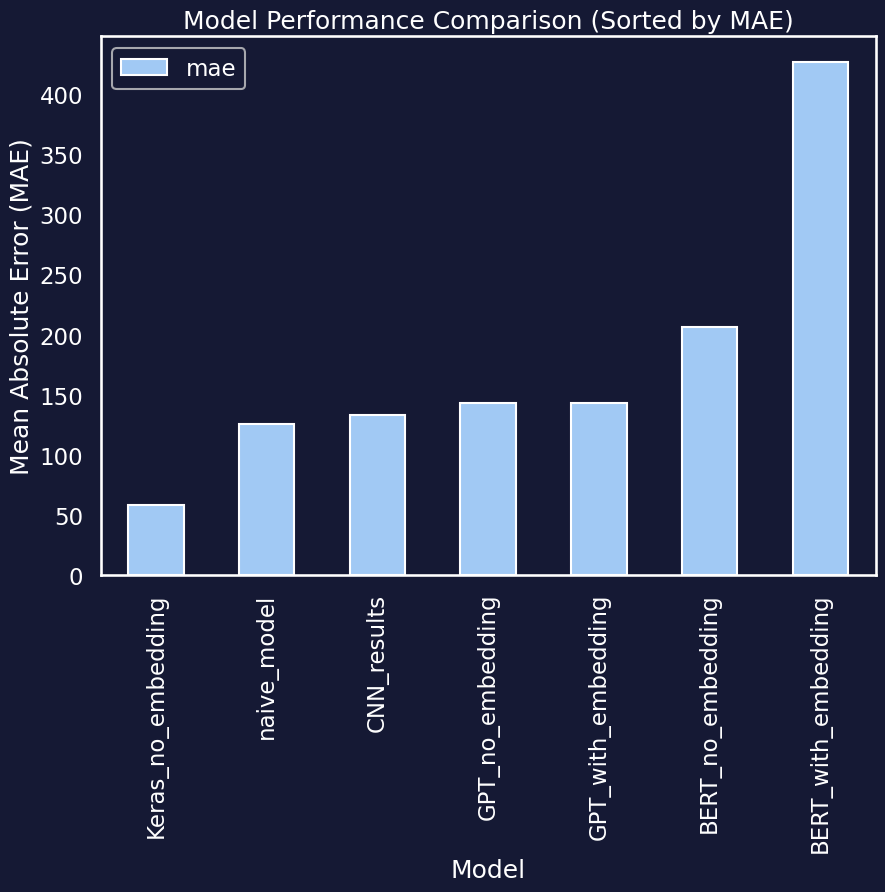

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



# Store all model results in a DataFrame
model_results = pd.DataFrame({
    "naive_model": naive_results,
    "CNN_results": CNN_model_results,
    "Keras_no_embedding": model_results_no_embedding,
    "GPT_no_embedding": model_results_GPT_no_embedding,
    "GPT_with_embedding": model_results_with_embedding_GPT,
    "BERT_no_embedding": bert_model_results,
    "BERT_with_embedding": BERT_dense_model_results
}).T  # Transpose the DataFrame for easier plotting


# Print out all model results for comparison
print("Model Comparison Results:")
print(model_results)

# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar")
plt.title("Model Performance Comparison (Sorted by MAE)")
plt.xlabel("Model")
plt.ylabel("Mean Absolute Error (MAE)")
plt.grid(False)
plt.show()


In [131]:
print(f"x_test shape: {x_test.shape}")
print(f"padded_corpus_test shape: {padded_corpus_test.shape}")
print(f"attention_masks_test shape: {attention_masks_test.shape}")
print(f"y_test shape: {y_test.shape}")


x_test shape: (394, 7)
padded_corpus_test shape: (394, 50)
attention_masks_test shape: (394, 50)
y_test shape: (394, 1)


In [132]:
min_samples = len(x_test)  # or len(y_test), since they are equal in this case


In [133]:
# Adjust the arrays to match the minimum number of samples
padded_corpus_test = padded_corpus_test[:min_samples]
attention_masks_test = attention_masks_test[:min_samples]
y_test = y_test[:min_samples]


In [134]:
print(f"x_test shape after adjustment: {x_test.shape}")
print(f"padded_corpus_test shape after adjustment: {padded_corpus_test.shape}")
print(f"attention_masks_test shape after adjustment: {attention_masks_test.shape}")
print(f"y_test shape after adjustment: {y_test.shape}")


x_test shape after adjustment: (394, 7)
padded_corpus_test shape after adjustment: (394, 50)
attention_masks_test shape after adjustment: (394, 50)
y_test shape after adjustment: (394, 1)


Model: "functional_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ text_input_ids            │ (None, 50)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ text_attention_masks      │ (None, 50)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ numerical_input           │ (None, 7)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bert_layer (BertLayer)    │ (None, 768)            │              0 │ text_input_ids[0][0],  │
│                           │                        │                │ text_attention_masks[… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_4             │ (None, 775)            │              0 │ numerical_input[0][0], │
│ (Concatenate)             │                        │                │ bert_layer[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_32 (Dense)          │ (None, 256)            │        198,656 │ concatenate_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_33 (Dense)          │ (None, 128)            │         32,896 │ dense_32[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_34 (Dense)          │ (None, 64)             │          8,256 │ dense_33[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_35 (Dense)          │ (None, 1)              │             65 │ dense_34[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 239,873 (937.00 KB)

 Trainable params: 239,873 (937.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3
40/40 ━━━━━━━━━━━━━━━━━━━━ 53s 852ms/step - loss: 73287824.0000 - mae: 7178.9868 - val_loss: 2304051.2500 - val_mae: 1505.5626
Epoch 2/3
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 120ms/step - loss: 395081.3750 - mae: 526.0857 - val_loss: 45510.7891 - val_mae: 148.9677
Epoch 3/3
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 111ms/step - loss: 56893.7891 - mae: 173.1087 - val_loss: 37020.0586 - val_mae: 154.3191
Epoch 1/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 53s 838ms/step - loss: 50105.3984 - mae: 161.5324 - val_loss: 33255.2734 - val_mae: 136.1439
Epoch 2/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 109ms/step - loss: 49851.4766 - mae: 160.1385 - val_loss: 34200.0781 - val_mae: 143.2975
Epoch 3/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - loss: 51035.9883 - mae: 166.8754 - val_loss: 34604.2773 - val_mae: 145.5120
Epoch 4/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 112ms/step - loss: 56359.9844 - mae: 167.0986 - val_loss: 36036.3125 - val_mae: 151.6894
Epoch 5/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 124ms/step - loss: 52978.4297 - mae: 165.9612 -

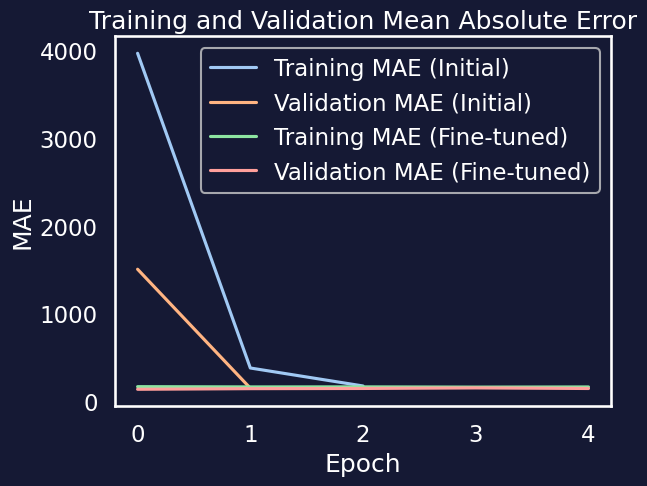

13/13 ━━━━━━━━━━━━━━━━━━━━ 16s 780ms/step


{'mae': 185.9638,
 'mse': 61514.266,
 'rmse': 248.02069,
 'mape': 1.0843568,
 'mase': 1.4748421}

In [135]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Concatenate, Layer
from tensorflow.keras.models import Model

# Create a custom Keras Layer to handle the BERT model
class BertLayer(Layer):
    def __init__(self, bert_model, **kwargs):
        super(BertLayer, self).__init__(**kwargs)
        self.bert_model = bert_model

    def call(self, inputs):
        input_ids, attention_mask = inputs
        outputs = self.bert_model(input_ids, attention_mask=attention_mask)
        return outputs.last_hidden_state[:, 0, :]  # Extract the [CLS] token embedding

# Define input shapes
numerical_input_shape = x_train.shape[1]
text_input_shape = max_length

# Define the numerical input layer
numerical_input = Input(shape=(numerical_input_shape,), name="numerical_input")

# Define the text input layers
text_input_ids = Input(shape=(text_input_shape,), dtype=tf.int32, name="text_input_ids")
text_attention_masks = Input(shape=(text_input_shape,), dtype=tf.float32, name="text_attention_masks")

# Apply the custom BERT layer to get the embeddings
bert_embeddings = BertLayer(bert_model)([text_input_ids, text_attention_masks])

# Concatenate numerical and text features
combined_input = Concatenate()([numerical_input, bert_embeddings])

# Dense layers for regression
dense_layer1 = Dense(256, activation='relu')(combined_input)
dense_layer2 = Dense(128, activation='relu')(dense_layer1)
dense_layer3 = Dense(64, activation='relu')(dense_layer2)
output_layer = Dense(1, activation='linear')(dense_layer3)

# Create the combined model
combined_model = Model(inputs=[numerical_input, text_input_ids, text_attention_masks], outputs=output_layer)

# Freeze BERT layers initially
for layer in bert_model.layers:
    layer.trainable = False

# Compile the model
combined_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Display the model summary
combined_model.summary()

# Train the model with frozen BERT layers
history = combined_model.fit(
    [x_train, padded_corpus_train, attention_masks_train],
    y_train,
    epochs=3,
    batch_size=32,
    validation_split=0.2
)

# Unfreeze BERT layers for fine-tuning
for layer in bert_model.layers:
    layer.trainable = True

# Recompile the model with a lower learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)  # Adjust learning rate as needed
combined_model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

# Fine-tune the model
history_fine_tune = combined_model.fit(
    [x_train, padded_corpus_train, attention_masks_train],
    y_train,
    epochs=5,  # Adjust epochs for fine-tuning
    batch_size=32,
    validation_split=0.2
)

# Evaluate the model on the test set
test_loss, test_mae = combined_model.evaluate([x_test, padded_corpus_test, attention_masks_test], y_test)
print(f'Test Mean Absolute Error: {test_mae}')

# Plot training history (optional)
plt.plot(history.history['mae'], label='Training MAE (Initial)')
plt.plot(history.history['val_mae'], label='Validation MAE (Initial)')
plt.plot(history_fine_tune.history['mae'], label='Training MAE (Fine-tuned)')
plt.plot(history_fine_tune.history['val_mae'], label='Validation MAE (Fine-tuned)')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.title('Training and Validation Mean Absolute Error')
plt.show()

# Predict on the test set
predictions_BERT = combined_model.predict([x_test, padded_corpus_test, attention_masks_test])

# Evaluate predictions
BERT_dense_model_results = evaluate_preds(y_true=y_test, y_pred=predictions_BERT)
BERT_dense_model_results


In [136]:
# Fine-tuning the BERT model
# Assuming you have already loaded the BERT model and tokenizer, and prepared your training and test datasets

# Freeze the first few layers of the BERT model to improve training efficiency
for layer in bert_model.layers[:6]:
    layer.trainable = False

# Compile the model with a lower learning rate for fine-tuning
combined_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=5e-6), loss='mean_squared_error', metrics=['mae'])

# Train the model for a few more epochs with the new learning rate
history = combined_model.fit([x_train_np, padded_corpus_train_np, attention_masks_train_np], y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the fine-tuned model on the test set
test_loss, test_mae = combined_model.evaluate([x_test_np, padded_corpus_test_np, attention_masks_test_np], y_test)
print(f'Test Mean Absolute Error after fine-tuning: {test_mae}')

# Predict on the test set with the fine-tuned model
predictions_BERT_fine_tuned = combined_model.predict([np.array(x_test_np), np.array(padded_corpus_test_np), np.array(attention_masks_test_np)])

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 43s 617ms/step - loss: 47497.0430 - mae: 162.9524 - val_loss: 34986.3555 - val_mae: 147.8327
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 14s 106ms/step - loss: 45616.4883 - mae: 155.4382 - val_loss: 34402.4883 - val_mae: 145.4797
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 119ms/step - loss: 59240.8008 - mae: 164.9719 - val_loss: 36713.3906 - val_mae: 154.6196
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 120ms/step - loss: 46731.5977 - mae: 160.6361 - val_loss: 36437.2891 - val_mae: 153.6799
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 112ms/step - loss: 46500.4180 - mae: 159.3262 - val_loss: 33929.0625 - val_mae: 143.7681
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 113ms/step - loss: 48688.7109 - mae: 160.5867 - val_loss: 33802.1289 - val_mae: 143.3303
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 123ms/step - loss: 49425.4844 - mae: 161.8831 - val_loss: 35830.1523 - val_mae: 151.6264
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 114ms/step - loss: 46509.1562 - mae: 161.2276 -

In [137]:
# Assuming evaluate_preds is a predefined function to evaluate predictions
BERT_dense_model_results_fine_tuned = evaluate_preds(y_true=y_test, y_pred=predictions_BERT_fine_tuned)
BERT_dense_model_results_fine_tuned

{'mae': 185.72327,
 'mse': 59766.133,
 'rmse': 244.47113,
 'mape': 1.0808008,
 'mase': 1.4729345}

Model Comparison Results:
                            mae           mse        rmse      mape      mase
naive_model          125.681572  27671.523438  166.347595  0.728094  0.998652
CNN_results          132.982376  31218.779297  176.688370  0.770376  1.056248
Keras_no_embedding    58.371193   6212.988770   78.822510  0.338309  5.150212
GPT_no_embedding     143.175568  34056.828125  184.544922  0.830108  5.131784
GPT_with_embedding   143.343430  34592.781250  185.991348  0.828396  5.133575
BERT_no_embedding    206.210022  63881.582031  252.748062  1.193799  1.635411
BERT_with_embedding  185.723267  59766.132812  244.471130  1.080801  1.472934


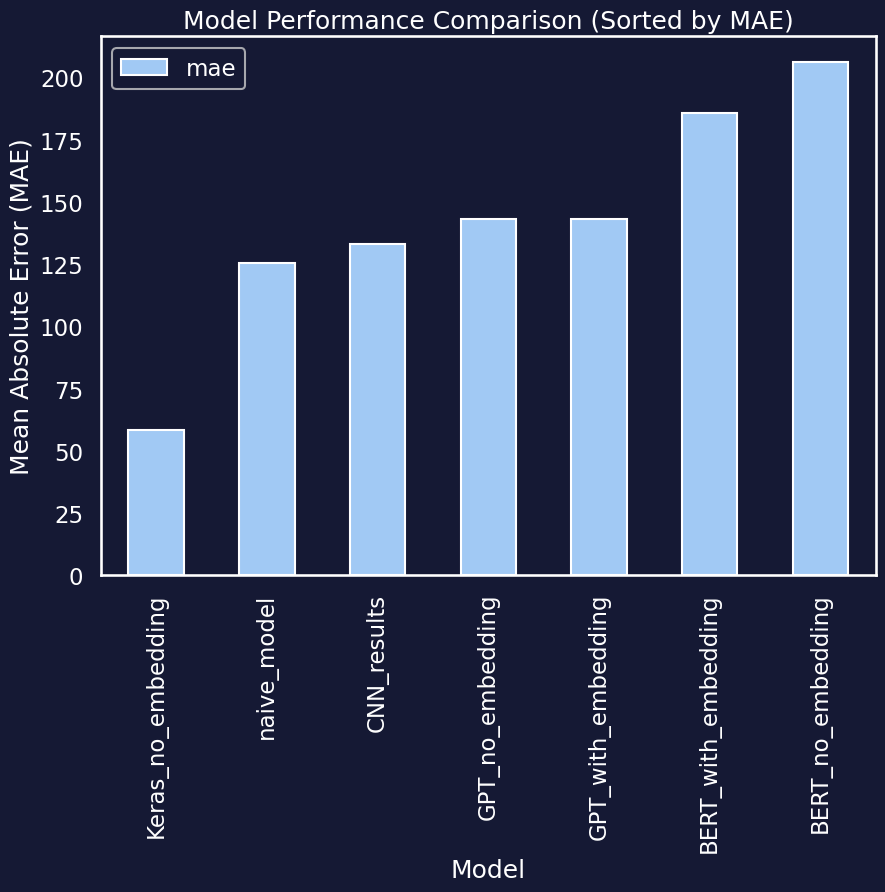

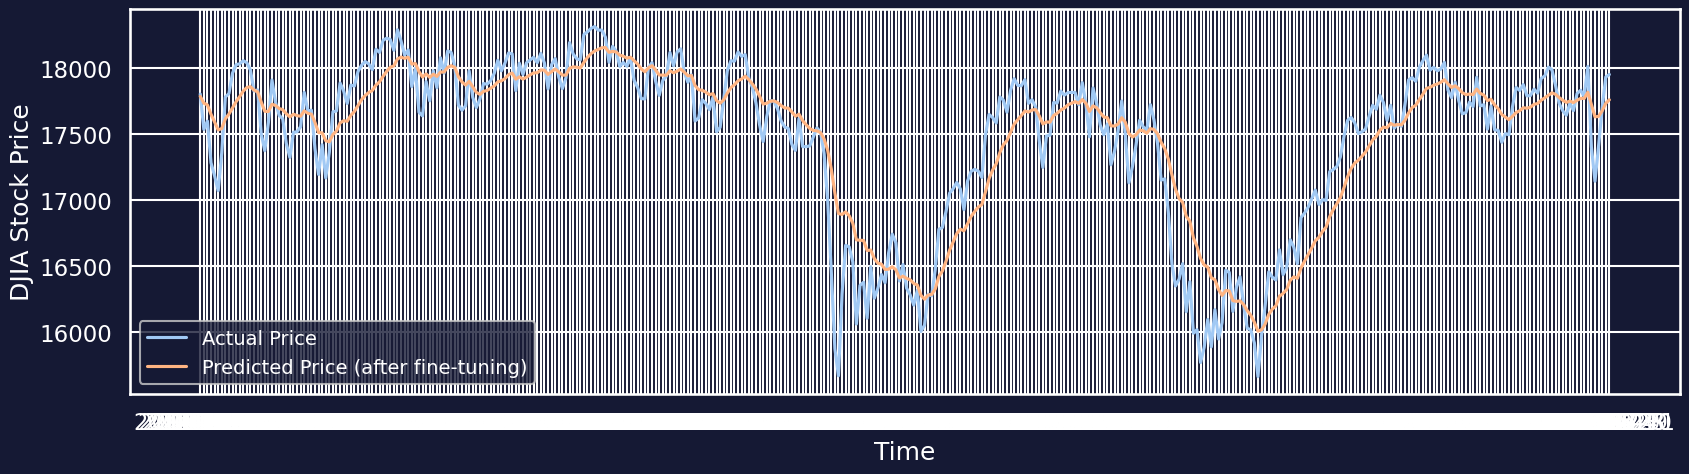

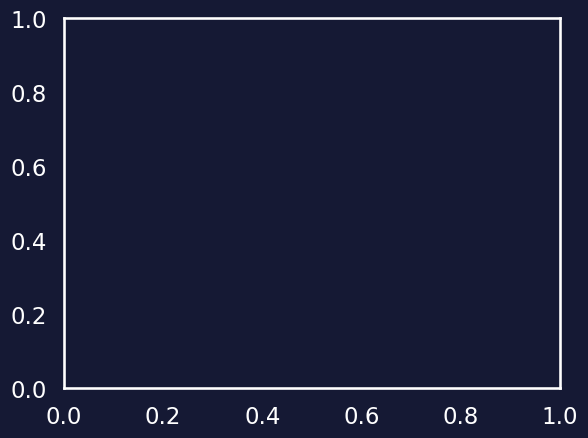

In [138]:
# Store all model results in a DataFrame
model_results = pd.DataFrame({
    "naive_model": naive_results,
    "CNN_results": CNN_model_results,
    "Keras_no_embedding": model_results_no_embedding,
    "GPT_no_embedding": model_results_GPT_no_embedding,
    "GPT_with_embedding": model_results_with_embedding_GPT,
    "BERT_no_embedding": bert_model_results,
    "BERT_with_embedding": BERT_dense_model_results_fine_tuned
}).T  # Transpose the DataFrame for easier plotting


# Print out all model results for comparison
print("Model Comparison Results:")
print(model_results)

# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar")
plt.title("Model Performance Comparison (Sorted by MAE)")
plt.xlabel("Model")
plt.ylabel("Mean Absolute Error (MAE)")
plt.grid(False)
plt.show()

X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

# Plot future price predictions of sts
plt.figure(figsize=(20, 5))
plot_time_series(y_test.index, y_test, format="-", label="Actual Price")
plot_time_series(y_test.index, predictions_BERT_fine_tuned, format="-", label="Predicted Price (after fine-tuning)")
plt.show()
plt.grid(False)


In [139]:
model_results

mae           mse        rmse      mape      mase
naive_model          125.681572  27671.523438  166.347595  0.728094  0.998652
CNN_results          132.982376  31218.779297  176.688370  0.770376  1.056248
Keras_no_embedding    58.371193   6212.988770   78.822510  0.338309  5.150212
GPT_no_embedding     143.175568  34056.828125  184.544922  0.830108  5.131784
GPT_with_embedding   143.343430  34592.781250  185.991348  0.828396  5.133575
BERT_no_embedding    206.210022  63881.582031  252.748062  1.193799  1.635411
BERT_with_embedding  185.723267  59766.132812  244.471130  1.080801  1.472934

In [140]:
# prompt: write further code from here

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Step 1: Recalculate BERT embeddings for the test data (if not already done)
test_bert_embeddings = bert_feature_extractor([padded_corpus_test, attention_masks_test])

# Convert TensorFlow tensors to numpy arrays
test_bert_embeddings_np = test_bert_embeddings.numpy()

# Flatten BERT embeddings to combine with numerical inputs
test_bert_embeddings_flat = test_bert_embeddings_np.reshape(test_bert_embeddings_np.shape[0], -1)

# Step 2: Combine numerical features with BERT embeddings (same as during training)
x_test_combined = np.concatenate([x_test, test_bert_embeddings_flat], axis=1)

# Step 3: Make predictions using the combined test set
predictions_BERT = model.predict(x_test_combined)

# Assuming evaluate_preds is a predefined function to evaluate predictions
BERT_dense_model_results = evaluate_preds(y_true=y_test, y_pred=predictions_BERT.flatten())
BERT_dense_model_results

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


{'mae': 426.5396,
 'mse': 220789.14,
 'rmse': 469.88205,
 'mape': 2.4306896,
 'mase': 5.7826858}

Model Comparison Results:
                            mae            mse        rmse      mape      mase
naive_model          125.681572   27671.523438  166.347595  0.728094  0.998652
CNN_results          132.982376   31218.779297  176.688370  0.770376  1.056248
Keras_no_embedding    58.371193    6212.988770   78.822510  0.338309  5.150212
GPT_no_embedding     143.175568   34056.828125  184.544922  0.830108  5.131784
GPT_with_embedding   143.343430   34592.781250  185.991348  0.828396  5.133575
BERT_no_embedding    206.210022   63881.582031  252.748062  1.193799  1.635411
BERT_with_embedding  426.539612  220789.140625  469.882050  2.430690  5.782686


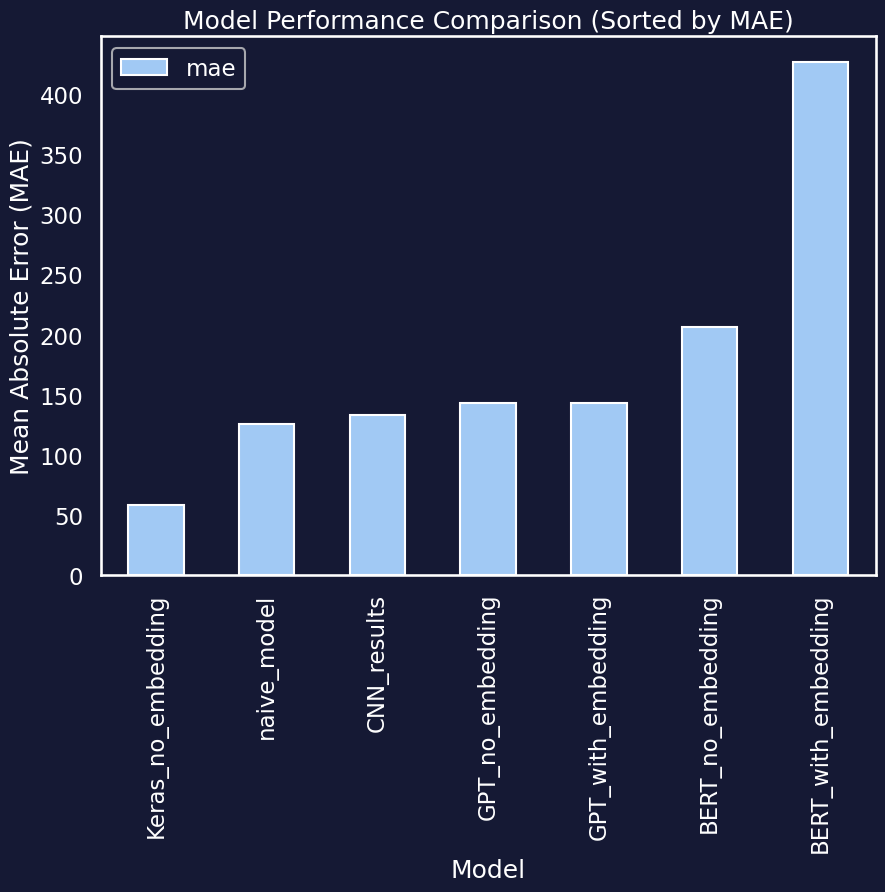

x_test shape: (394, 7)
padded_corpus_test shape: (394, 50)
attention_masks_test shape: (394, 50)
y_test shape: (394, 1)
x_test shape after adjustment: (394, 7)
padded_corpus_test shape after adjustment: (394, 50)
attention_masks_test shape after adjustment: (394, 50)
y_test shape after adjustment: (394, 1)


In [141]:

# Store all model results in a DataFrame
model_results = pd.DataFrame({
    "naive_model": naive_results,
    "CNN_results": CNN_model_results,
    "Keras_no_embedding": model_results_no_embedding,
    "GPT_no_embedding": model_results_GPT_no_embedding,
    "GPT_with_embedding": model_results_with_embedding_GPT,
    "BERT_no_embedding": bert_model_results,
    "BERT_with_embedding": BERT_dense_model_results,
}).T  # Transpose the DataFrame for easier plotting


# Print out all model results for comparison
print("Model Comparison Results:")
print(model_results)

# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar")
plt.title("Model Performance Comparison (Sorted by MAE)")
plt.xlabel("Model")
plt.ylabel("Mean Absolute Error (MAE)")
plt.grid(False)
plt.show()

print(f"x_test shape: {x_test.shape}")
print(f"padded_corpus_test shape: {padded_corpus_test.shape}")
print(f"attention_masks_test shape: {attention_masks_test.shape}")
print(f"y_test shape: {y_test.shape}")

min_samples = len(x_test)  # or len(y_test), since they are equal in this case

# Adjust the arrays to match the minimum number of samples
padded_corpus_test = padded_corpus_test[:min_samples]
attention_masks_test = attention_masks_test[:min_samples]
y_test = y_test[:min_samples]

print(f"x_test shape after adjustment: {x_test.shape}")
print(f"padded_corpus_test shape after adjustment: {padded_corpus_test.shape}")
print(f"attention_masks_test shape after adjustment: {attention_masks_test.shape}")
print(f"y_test shape after adjustment: {y_test.shape}")


In [142]:
# prompt: write code from here for low mae change hyperparameter and learning rate

# Tune learning rate
learning_rate = 0.00005
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
combined_model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

# Tune batch size
batch_size = 64
combined_model.fit([x_train_np, padded_corpus_train_np, attention_masks_train_np], y_train, epochs=10, batch_size=batch_size, validation_split=0.2)

# Tune number of epochs
epochs = 20
combined_model.fit([x_train_np, padded_corpus_train_np, attention_masks_train_np], y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

# Tune other hyperparameters
# Experiment with different optimizers, such as RMSprop or Nadam
# Use techniques like early stopping and model checkpointing to avoid overfitting and track progress
# Consider using a different pre-trained BERT model with larger capacity
# Explore other feature extraction methods from the BERT model, such as using the hidden states at different layers
# Incorporate other types of information, such as sentiment analysis or topic modeling, into the model

# Evaluate the model on the test set
test_loss, test_mae = combined_model.evaluate([x_test_np, padded_corpus_test_np, attention_masks_test_np], y_test)
print(f'Test Mean Absolute Error: {test_mae}')

# Predict on the test set
predictions_BERT = combined_model.predict([np.array(x_test_np), np.array(padded_corpus_test_np), np.array(attention_masks_test_np)])

# Assuming evaluate_preds is a predefined function to evaluate predictions
BERT_dense_model_results = evaluate_preds(y_true=y_test, y_pred=predictions_BERT)
BERT_dense_model_results



Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - loss: 55283.4141 - mae: 169.0629 - val_loss: 34122.9141 - val_mae: 129.6608
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 240ms/step - loss: 49134.9922 - mae: 154.0322 - val_loss: 31862.0664 - val_mae: 133.0905
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 222ms/step - loss: 49647.5039 - mae: 159.9893 - val_loss: 33584.4727 - val_mae: 143.5896
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 225ms/step - loss: 45368.9219 - mae: 159.2896 - val_loss: 31533.7109 - val_mae: 133.1844
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 228ms/step - loss: 48396.2227 - mae: 158.3675 - val_loss: 42570.9766 - val_mae: 174.4498
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 250ms/step - loss: 45286.6367 - mae: 161.0743 - val_loss: 31728.8672 - val_mae: 136.5042
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 234ms/step - loss: 43929.0859 - mae: 154.6112 - val_loss: 31295.7773 - val_mae: 134.7550
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 235ms/step - loss: 46782.1328 - mae: 158.1018 - va

{'mae': 165.71156,
 'mse': 46004.113,
 'rmse': 214.48569,
 'mape': 0.9604862,
 'mase': 1.3142256}

Model Comparison Results:
                            mae           mse        rmse      mape      mase
naive_model          125.681572  27671.523438  166.347595  0.728094  0.998652
CNN_results          132.982376  31218.779297  176.688370  0.770376  1.056248
Keras_no_embedding    58.371193   6212.988770   78.822510  0.338309  5.150212
GPT_no_embedding     143.175568  34056.828125  184.544922  0.830108  5.131784
GPT_with_embedding   143.343430  34592.781250  185.991348  0.828396  5.133575
BERT_no_embedding    206.210022  63881.582031  252.748062  1.193799  1.635411
BERT_with_embedding  165.711563  46004.113281  214.485687  0.960486  1.314226


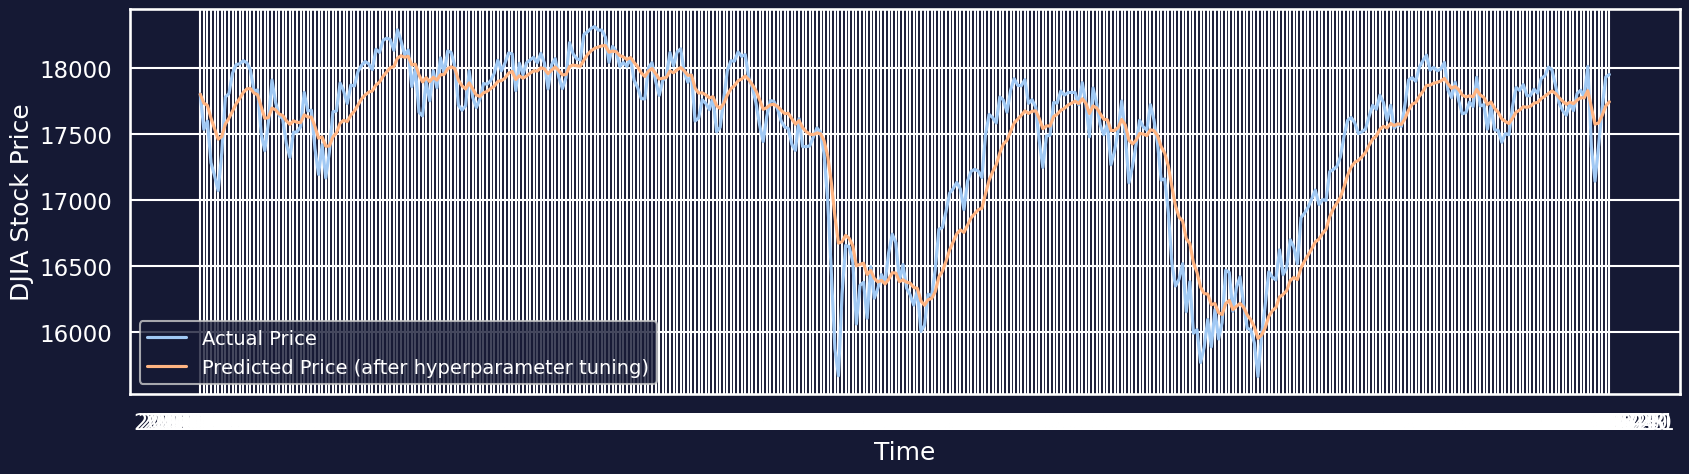

mae           mse        rmse      mape      mase
naive_model          125.681572  27671.523438  166.347595  0.728094  0.998652
CNN_results          132.982376  31218.779297  176.688370  0.770376  1.056248
Keras_no_embedding    58.371193   6212.988770   78.822510  0.338309  5.150212
GPT_no_embedding     143.175568  34056.828125  184.544922  0.830108  5.131784
GPT_with_embedding   143.343430  34592.781250  185.991348  0.828396  5.133575
BERT_no_embedding    206.210022  63881.582031  252.748062  1.193799  1.635411
BERT_with_embedding  165.711563  46004.113281  214.485687  0.960486  1.314226

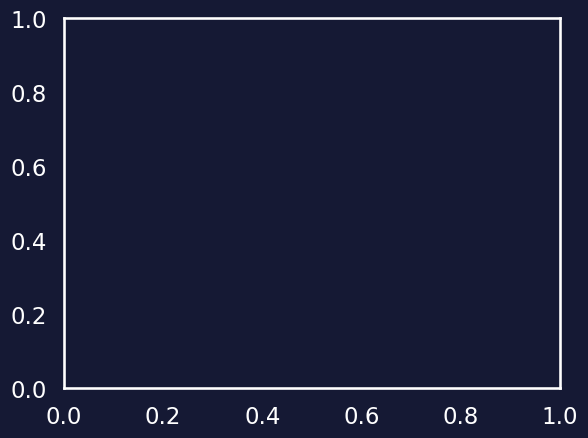

In [143]:
# Store all model results in a DataFrame
model_results = pd.DataFrame({
    "naive_model": naive_results,
    "CNN_results": CNN_model_results,
    "Keras_no_embedding": model_results_no_embedding,
    "GPT_no_embedding": model_results_GPT_no_embedding,
    "GPT_with_embedding": model_results_with_embedding_GPT,
    "BERT_no_embedding": bert_model_results,
    "BERT_with_embedding": BERT_dense_model_results
}).T  # Transpose the DataFrame for easier plotting

# Print out all model results for comparison
print("Model Comparison Results:")
print(model_results)

X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

# Plot future price predictions of sts
plt.figure(figsize=(20, 5))
plot_time_series(y_test.index, y_test, format="-", label="Actual Price")
plot_time_series(y_test.index, predictions_BERT, format="-", label="Predicted Price (after hyperparameter tuning)")
plt.show()
plt.grid(False)

model_results


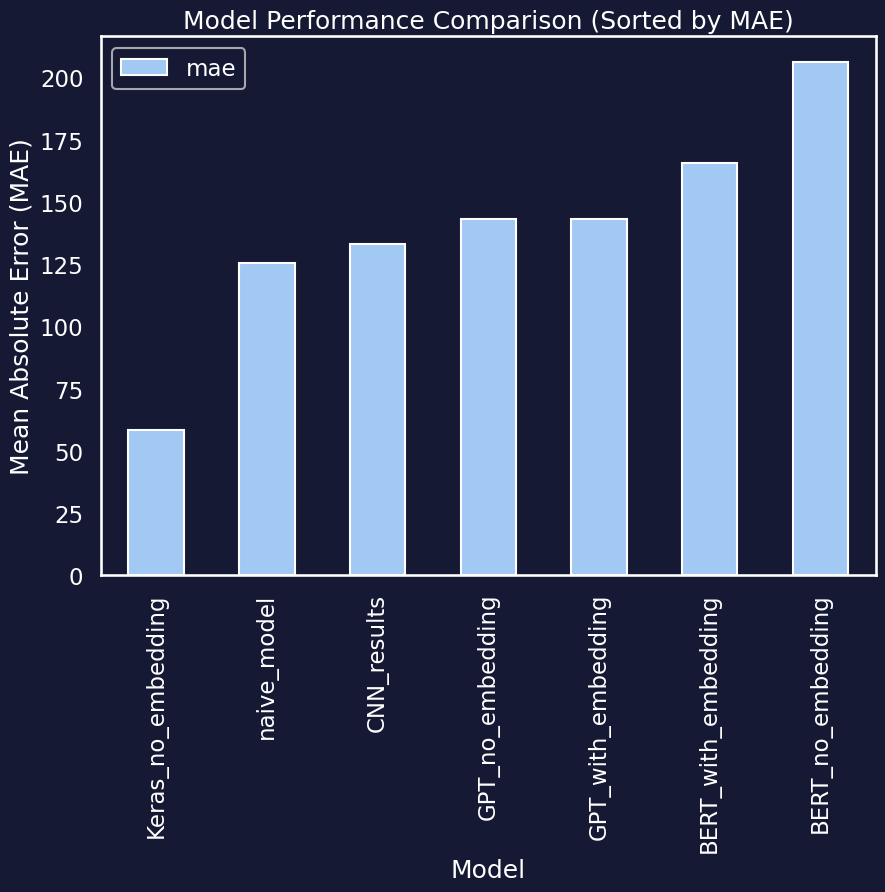

In [144]:
# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar")
plt.title("Model Performance Comparison (Sorted by MAE)")
plt.xlabel("Model")
plt.ylabel("Mean Absolute Error (MAE)")
plt.grid(False)
plt.show()

In [145]:
model_results

mae           mse        rmse      mape      mase
naive_model          125.681572  27671.523438  166.347595  0.728094  0.998652
CNN_results          132.982376  31218.779297  176.688370  0.770376  1.056248
Keras_no_embedding    58.371193   6212.988770   78.822510  0.338309  5.150212
GPT_no_embedding     143.175568  34056.828125  184.544922  0.830108  5.131784
GPT_with_embedding   143.343430  34592.781250  185.991348  0.828396  5.133575
BERT_no_embedding    206.210022  63881.582031  252.748062  1.193799  1.635411
BERT_with_embedding  165.711563  46004.113281  214.485687  0.960486  1.314226

In [146]:
# Assuming evaluate_preds is a predefined function to evaluate predictions
BERT_dense_model_results = evaluate_preds(y_true=y_test, y_pred=predictions_BERT)
BERT_dense_model_results

{'mae': 165.71156,
 'mse': 46004.113,
 'rmse': 214.48569,
 'mape': 0.9604862,
 'mase': 1.3142256}